In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings

# Suprimir todos los warnings
warnings.filterwarnings('ignore')

# Ahora puedes ejecutar tu código sin que aparezcan mensajes de advertencia


In [3]:
warnings.filterwarnings('ignore', category=UserWarning)


In [4]:
historico = pd.read_excel('historico_velocidad_internet_final.xlsx')
historico_totales = pd.read_excel('historico_velocidad_internet_totales_final.xlsx')
provincias = pd.read_excel('Provincia.xlsx')
trimestre = pd.read_excel('Trimestre.xlsx')
año = pd.read_excel('Año.xlsx')
banda = pd.read_excel('Internet_BAF_final.xlsx')
banda_totales = pd.read_excel('Internet_BAF_totales_final.xlsx')
acc_por_tec = pd.read_excel('Internet_Accesos-por-tecnologia_final.xlsx')
acc_por_tec_totales = pd.read_excel('Internet_Accesos-por-tecnologia_totales_final.xlsx')
acc_por_vel_totales = pd.read_excel('Internet_Accesos-por-velocidad-totales_final.xlsx')
acc_por_vel = pd.read_excel('Internet_Accesos-por-velocidad_final.xlsx')
ingresos = pd.read_excel('Internet_Ingresos.xlsx')
conectividad = pd.read_excel('mapa_conectividad_final.xlsx')
penetracion_hog = pd.read_excel('penetracion_hogares_final.xlsx')
penetracion_pob = pd.read_excel('penetracion_poblacion_final.xlsx')
penetracion_totales = pd.read_excel('penetracion_totales_final.xlsx')



In [5]:
import pandas as pd

# Aumentar el límite de filas y columnas visualizadas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [6]:
print("Información del dataframe historico:")
print(historico.info())
print('\n')
print("Primeras filas del dataframe historico:")
print(historico.head())
print("\n")

Información del dataframe historico:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            864 non-null    int64  
 1   Unnamed: 0              864 non-null    int64  
 2   Año                     864 non-null    int64  
 3   Trimestre               864 non-null    int64  
 4   Provincia               864 non-null    object 
 5   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB
None


Primeras filas del dataframe historico:
   Unnamed: 0.1  Unnamed: 0   Año  Trimestre        Provincia   
0             0           0  2022          4     Buenos Aires  \
1             1           1  2022          4  Capital Federal   
2             2           2  2022          4        Catamarca   
3             3           3  2022          4            Chaco   


no tiene datos nulos tiene algunas columnas que unnamed que luego eliminaremos

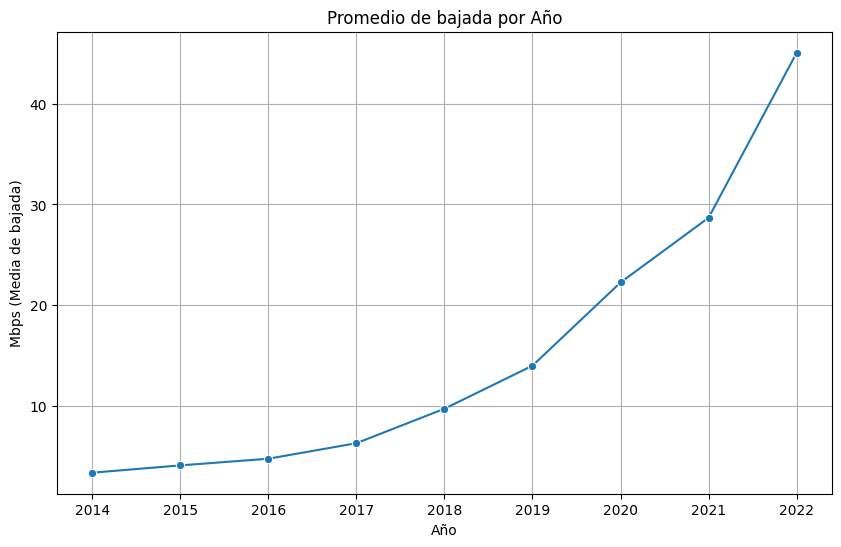

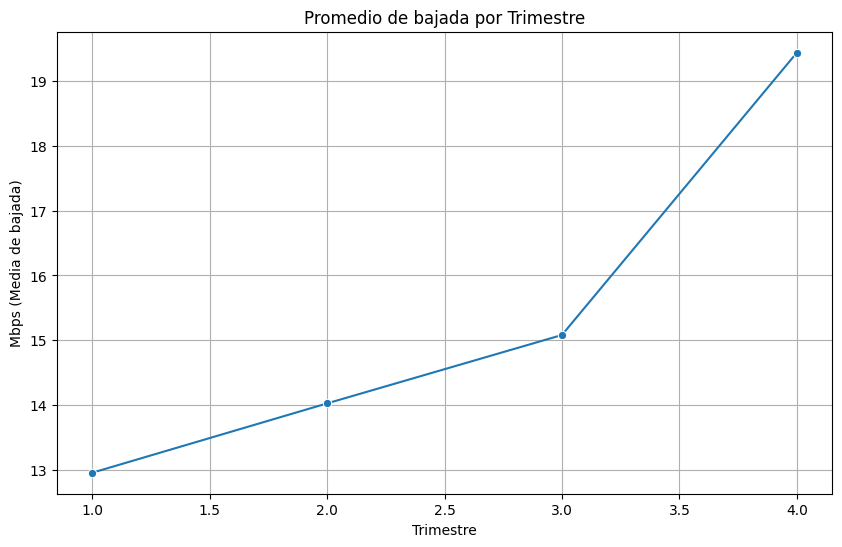

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar las columnas no necesarias
historico = historico.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# Grafico 1: Promedio de bajada por Año
plt.figure(figsize=(10, 6))
sns.lineplot(data=historico, x='Año', y='Mbps (Media de bajada)', estimator='mean', ci=None, marker='o')
plt.title('Promedio de bajada por Año')
plt.ylabel('Mbps (Media de bajada)')
plt.xlabel('Año')
plt.grid(True)
plt.show()

# Grafico 2: Promedio de bajada por Trimestre
plt.figure(figsize=(10, 6))
sns.lineplot(data=historico, x='Trimestre', y='Mbps (Media de bajada)', estimator='mean', ci=None, marker='o')
plt.title('Promedio de bajada por Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.xlabel('Trimestre')
plt.grid(True)
plt.show()


Podemos ver que el promedio de velocidad de bajada ha aumentado exponencialmente  de menos de 5 Mbps en 2014 a casi 50 Mbps en 2022.

Esto significa una mejora en la calidad del internet muy grande y muy necesaria para estos tiempos

Por otro lado puede verse que al terminar el año (trimestre 4) se termina con mas velocidad de bajada que en los trimestre anteriores , se ve el progreso intraanual en este gráfico

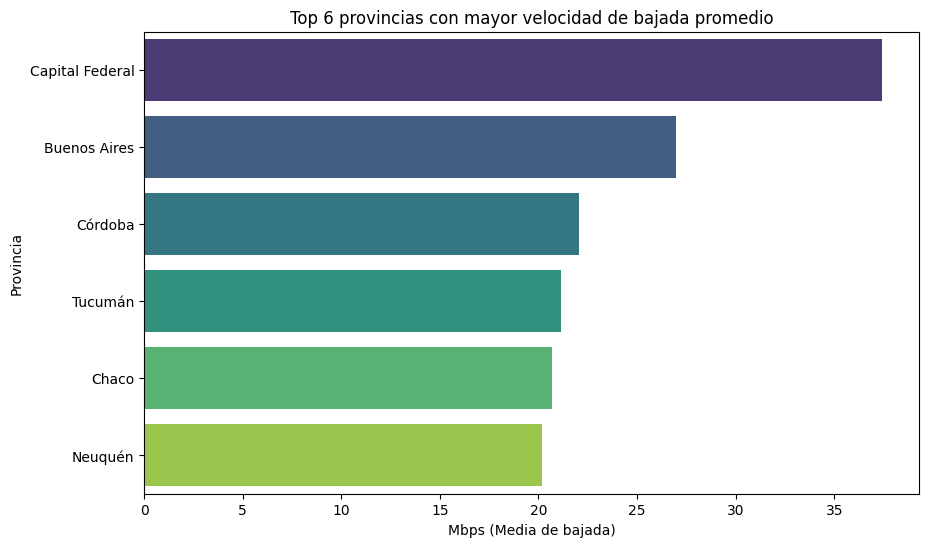

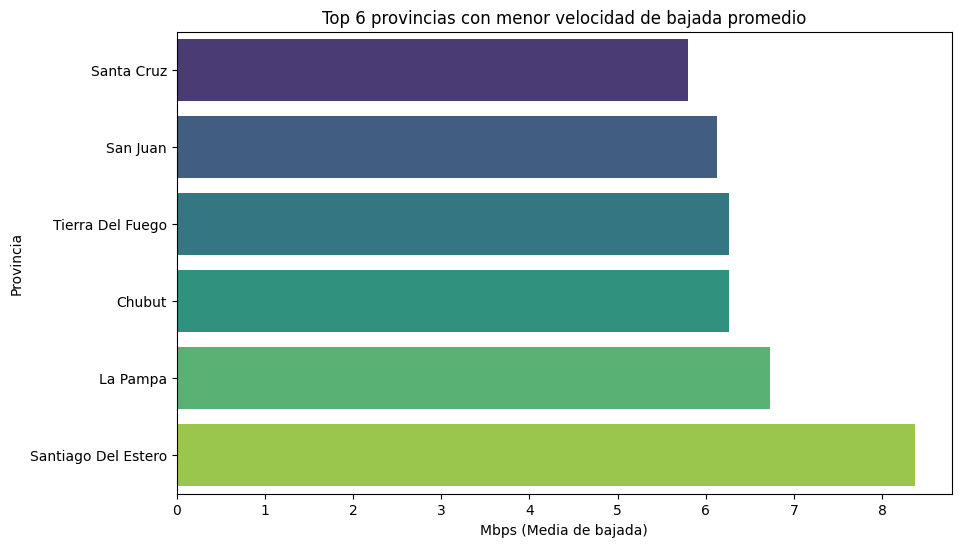

In [8]:
# Calcular el promedio de la velocidad de bajada por provincia
promedio_por_provincia = historico.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Obtener el top 6 de provincias con mayor y menor velocidad de bajada promedio
top_6_mayor = promedio_por_provincia.nlargest(6)
top_6_menor = promedio_por_provincia.nsmallest(6)

# Gráfico de barras con el top 6 provincias con mayor velocidad de bajada promedio
plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_mayor.values, y=top_6_mayor.index, palette='viridis')
plt.title('Top 6 provincias con mayor velocidad de bajada promedio')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Provincia')
plt.show()

# Gráfico de barras con el top 6 provincias con menor velocidad de bajada promedio
plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_menor.values, y=top_6_menor.index, palette='viridis')
plt.title('Top 6 provincias con menor velocidad de bajada promedio')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Provincia')
plt.show()

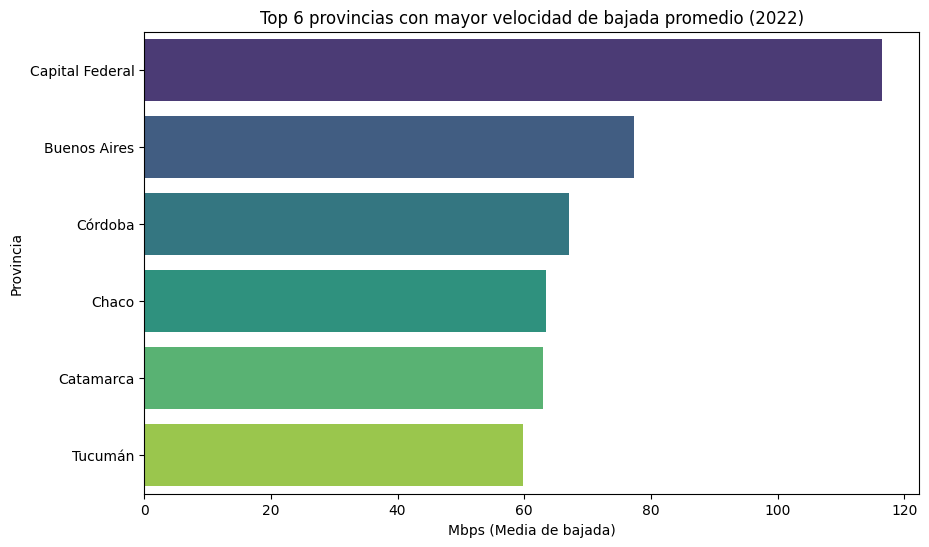

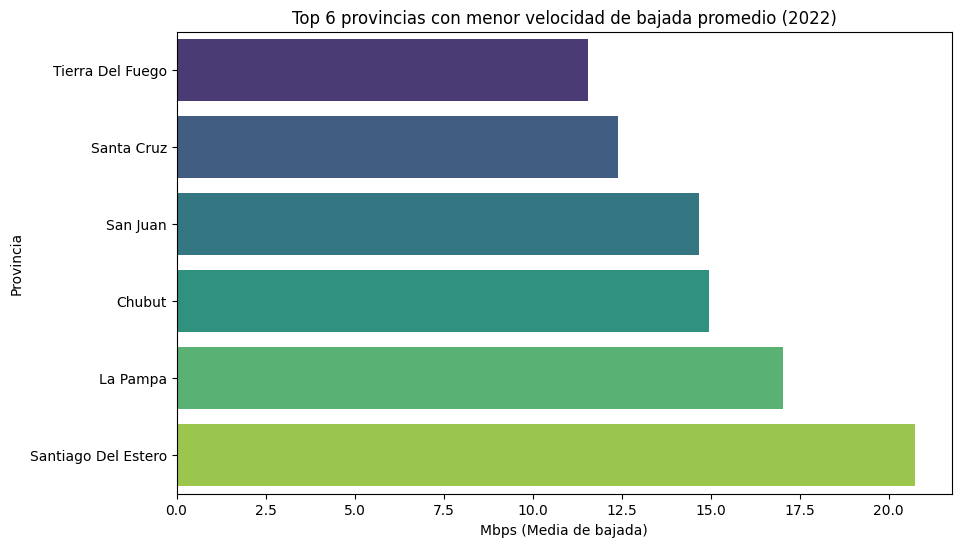

In [9]:
# Filtrar el DataFrame para quedarse solo con los datos de 2022
historico_2022 = historico[historico['Año'] == 2022]

# Calcular el promedio de la velocidad de bajada por provincia para 2022
promedio_por_provincia_2022 = historico_2022.groupby('Provincia')['Mbps (Media de bajada)'].mean()

# Obtener el top 6 de provincias con mayor y menor velocidad de bajada promedio para 2022
top_6_mayor_2022 = promedio_por_provincia_2022.nlargest(6)
top_6_menor_2022 = promedio_por_provincia_2022.nsmallest(6)

# Gráfico de barras con el top 6 provincias con mayor velocidad de bajada promedio para 2022
plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_mayor_2022.values, y=top_6_mayor_2022.index, palette='viridis')
plt.title('Top 6 provincias con mayor velocidad de bajada promedio (2022)')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Provincia')
plt.show()

# Gráfico de barras con el top 6 provincias con menor velocidad de bajada promedio para 2022
plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_menor_2022.values, y=top_6_menor_2022.index, palette='viridis')
plt.title('Top 6 provincias con menor velocidad de bajada promedio (2022)')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Provincia')
plt.show()

In [10]:
print("Información del dataframe historico_totales:")
print(historico_totales.info())
print('\n')
print("Primeras filas del dataframe historico_totales:")
print(historico_totales.head())
print("\n")

Información del dataframe historico_totales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              36 non-null     int64  
 1   Año                     36 non-null     int64  
 2   Trimestre               36 non-null     int64  
 3   Mbps (Media de bajada)  36 non-null     float64
 4   Trimestre.1             36 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB
None


Primeras filas del dataframe historico_totales:
   Unnamed: 0   Año  Trimestre  Mbps (Media de bajada)    Trimestre.1
0           0  2022          4                  106.56   Oct-Dic 2022
1           1  2022          3                   62.46  Jul-Sept 2022
2           2  2022          2                   58.44   Abr-Jun 2022
3           3  2022          1                   55.11   Ene-Mar 2022
4           4  

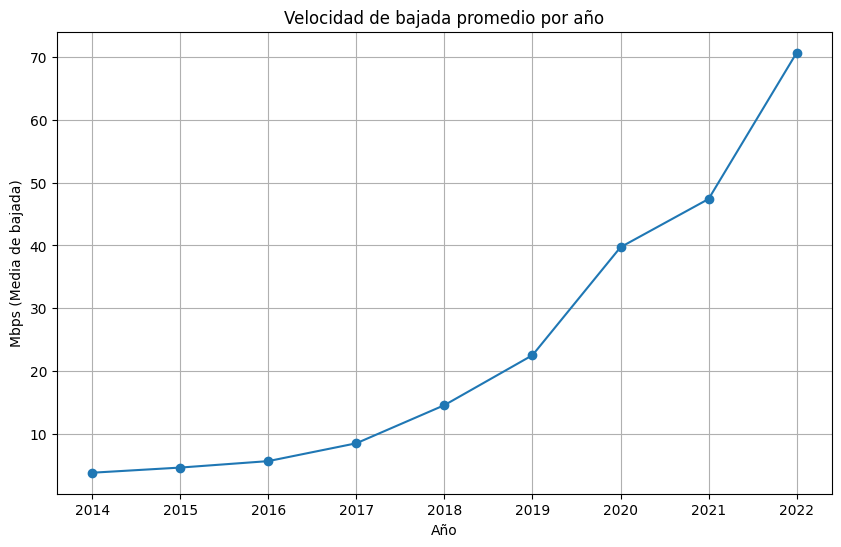

In [11]:
import matplotlib.pyplot as plt

# Calcular la velocidad de bajada promedio por año
velocidad_promedio_por_año = historico_totales.groupby('Año')['Mbps (Media de bajada)'].mean()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
velocidad_promedio_por_año.plot(marker='o')
plt.title('Velocidad de bajada promedio por año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.show()


Este dataframe es similar al anterior , pero lo datos muestran un aumento mucho mayor terminando con un velocidad media de bajada de 70 Mbps en el Año 2022

In [12]:
print("Información del dataframe provincias:")
print(provincias.info())
print('\n')
print("Primeras filas del dataframe provincias:")
print(provincias.head())
print("\n")

Información del dataframe provincias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  24 non-null     int64 
 1   Provincia   24 non-null     object
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes
None


Primeras filas del dataframe provincias:
   Unnamed: 0        Provincia
0           0     Buenos Aires
1           1  Capital Federal
2           2        Catamarca
3           3            Chaco
4           4           Chubut




Un dataframe que hice yo con las provincias

In [13]:
print("Información del dataframe trimestre:")
print(trimestre.info())
print('\n')
print("Primeras filas del dataframe trimestre:")
print(trimestre.head())
print("\n")

Información del dataframe trimestre:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4 non-null      int64
 1   Trimestre   4 non-null      int64
dtypes: int64(2)
memory usage: 196.0 bytes
None


Primeras filas del dataframe trimestre:
   Unnamed: 0  Trimestre
0           0          1
1           1          2
2           2          3
3           3          4




UN dataframe con los trimestres

In [14]:
print("Información del dataframe año:")
print(año.info())
print('\n')
print("Primeras filas del dataframe año:")
print(año.head())
print("\n")

Información del dataframe año:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  9 non-null      int64
 1   Año         9 non-null      int64
dtypes: int64(2)
memory usage: 276.0 bytes
None


Primeras filas del dataframe año:
   Unnamed: 0   Año
0           0  2014
1           1  2015
2           2  2016
3           3  2017
4           4  2018




Un dataframe con los años 2014 al 2022

In [15]:
print("Información del dataframe banda:")
print(banda.info())
print('\n')
print("Primeras filas del dataframe banda:")
print(banda.head())
print("\n")

Información del dataframe banda:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        864 non-null    int64  
 1   Año               864 non-null    int64  
 2   Trimestre         864 non-null    int64  
 3   Provincia         864 non-null    object 
 4   Banda ancha fija  864 non-null    int64  
 5   Dial up           862 non-null    float64
 6   Total             864 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 47.4+ KB
None


Primeras filas del dataframe banda:
   Unnamed: 0   Año  Trimestre        Provincia  Banda ancha fija  Dial up   
0           0  2022          4     Buenos Aires           4788466   6199.0  \
1           1  2022          4  Capital Federal           1549781   2145.0   
2           2  2022          4        Catamarca             70908      1.0   
3           3  2022   

La banda ancha fija se refiere a un tipo de conexión a Internet de alta velocidad que utiliza una conexión física, como una línea telefónica o un cable, para proporcionar acceso a Internet a los usuarios. Este tipo de conexión es generalmente más rápido y más confiable que las conexiones de acceso telefónico, también conocidas como conexiones dial-up.

El acceso telefónico, por otro lado, es un tipo de conexión a Internet que utiliza una línea telefónica analógica para establecer una conexión con un proveedor de servicios de Internet (ISP). Este tipo de conexión es generalmente más lento que la banda ancha fija y puede ser menos confiable, ya que la calidad de la conexión puede verse afectada por factores como la calidad de la línea telefónica y la distancia entre el usuario y el ISP.

En resumen, la banda ancha fija ofrece una conexión a Internet de alta velocidad a través de una conexión física, mientras que el acceso telefónico utiliza una línea telefónica analógica para proporcionar una conexión a Internet más lenta y menos confiable.

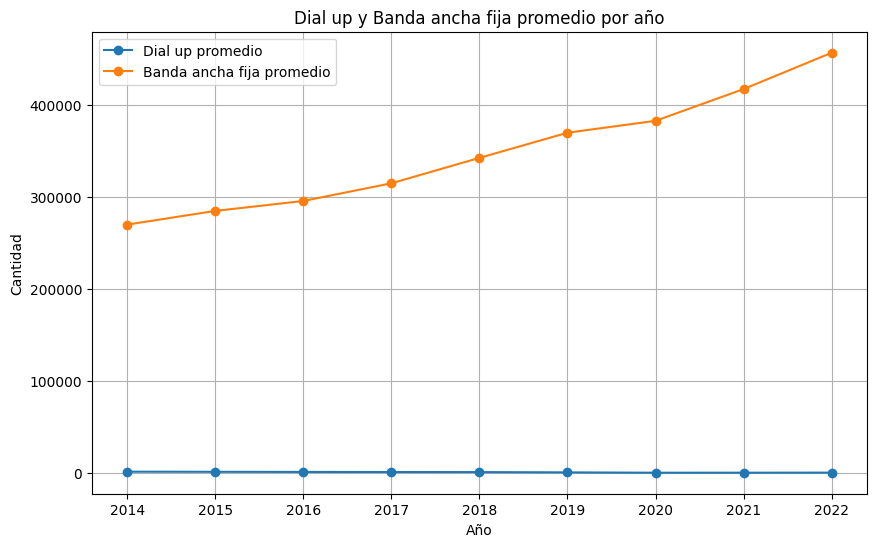

In [16]:
import matplotlib.pyplot as plt

# Eliminar la columna no necesaria
banda = banda.drop(columns=['Unnamed: 0'])

# Calcular el promedio de Dial up y Banda ancha fija por año
promedio_dial_up_por_año = banda.groupby('Año')['Dial up'].mean()
promedio_banda_ancho_por_año = banda.groupby('Año')['Banda ancha fija'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
promedio_dial_up_por_año.plot(marker='o', label='Dial up promedio')
promedio_banda_ancho_por_año.plot(marker='o', label='Banda ancha fija promedio')
plt.title('Dial up y Banda ancha fija promedio por año')
plt.ylabel('Cantidad')
plt.xlabel('Año')
plt.legend()
plt.grid(True)
plt.show()


Vemos que la cantidad de banda ancha fija se multiplicó por 2 en los ultimos 8 años

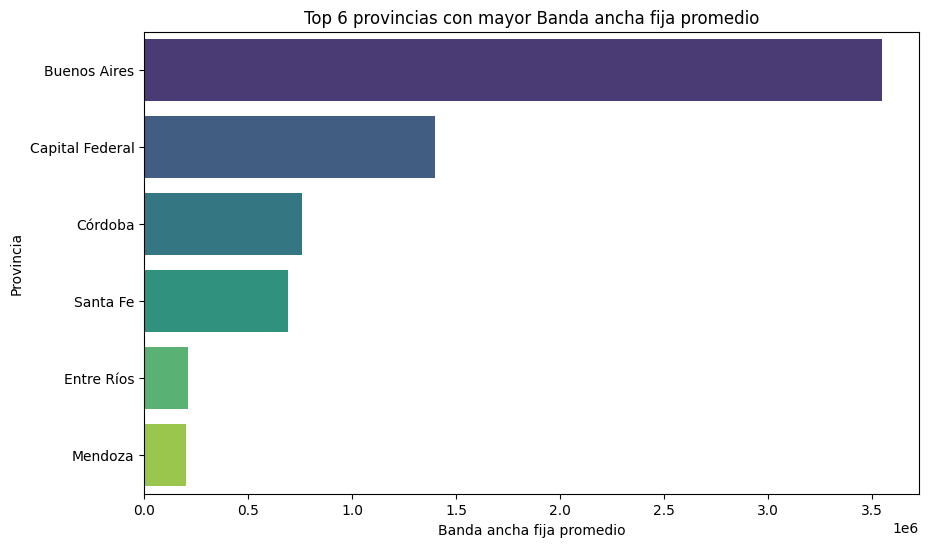

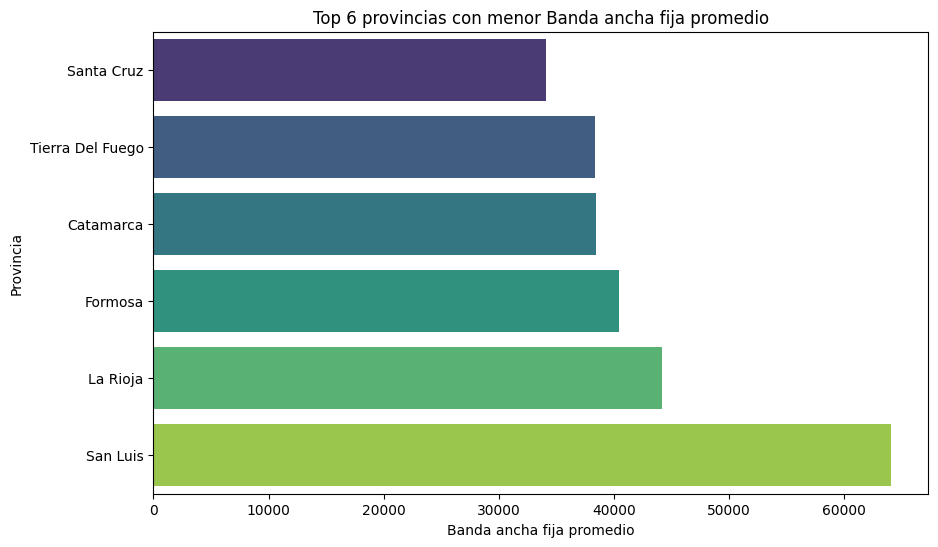

In [17]:
# Calcular el promedio de Banda ancha fija por provincia
promedio_banda_ancho_por_provincia = banda.groupby('Provincia')['Banda ancha fija'].mean()

# Obtener el top 6 de provincias con mayor y menor Banda ancha fija promedio
top_6_mayor_banda_ancho = promedio_banda_ancho_por_provincia.nlargest(6)
top_6_menor_banda_ancho = promedio_banda_ancho_por_provincia.nsmallest(6)

# Gráfico de barras con el top 6 provincias con mayor Banda ancha fija promedio
plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_mayor_banda_ancho.values, y=top_6_mayor_banda_ancho.index, palette='viridis')
plt.title('Top 6 provincias con mayor Banda ancha fija promedio')
plt.xlabel('Banda ancha fija promedio')
plt.ylabel('Provincia')
plt.show()

# Gráfico de barras con el top 6 provincias con menor Banda ancha fija promedio
plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_menor_banda_ancho.values, y=top_6_menor_banda_ancho.index, palette='viridis')
plt.title('Top 6 provincias con menor Banda ancha fija promedio')
plt.xlabel('Banda ancha fija promedio')
plt.ylabel('Provincia')
plt.show()

Un top muy similar al anterior , veremos si se siguen repitiendo 

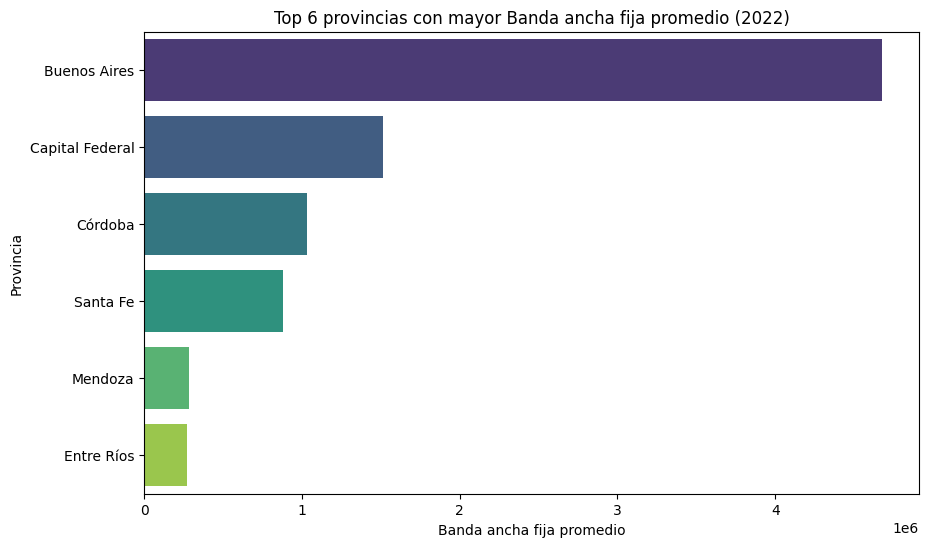

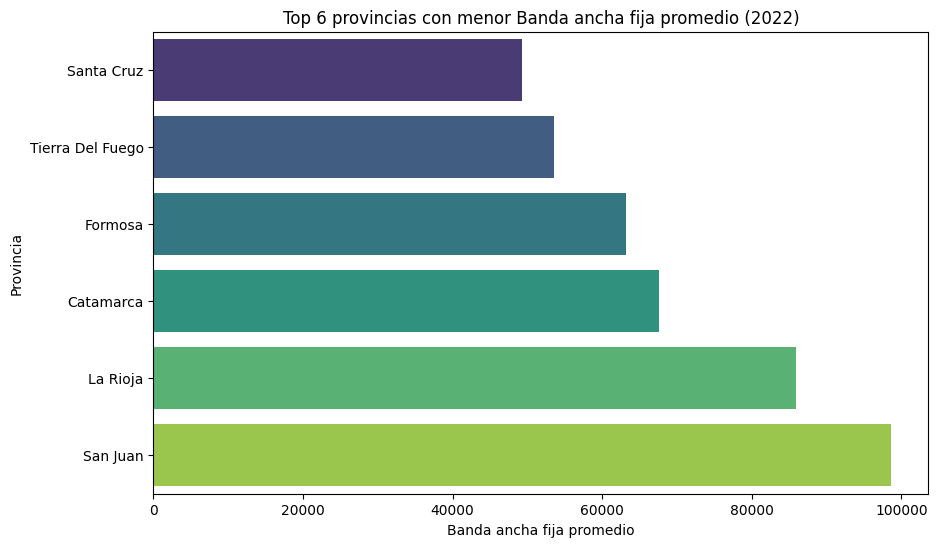

In [18]:
# Filtrar el DataFrame para quedarse solo con los datos de 2022
banda_2022 = banda[banda['Año'] == 2022]

# Calcular el promedio de Banda ancha fija por provincia para 2022
promedio_banda_ancho_por_provincia_2022 = banda_2022.groupby('Provincia')['Banda ancha fija'].mean()

# Obtener el top 6 de provincias con mayor y menor Banda ancha fija promedio para 2022
top_6_mayor_banda_ancho_2022 = promedio_banda_ancho_por_provincia_2022.nlargest(6)
top_6_menor_banda_ancho_2022 = promedio_banda_ancho_por_provincia_2022.nsmallest(6)

# Gráfico de barras con el top 6 provincias con mayor Banda ancha fija promedio para 2022
plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_mayor_banda_ancho_2022.values, y=top_6_mayor_banda_ancho_2022.index, palette='viridis')
plt.title('Top 6 provincias con mayor Banda ancha fija promedio (2022)')
plt.xlabel('Banda ancha fija promedio')
plt.ylabel('Provincia')
plt.show()

# Gráfico de barras con el top 6 provincias con menor Banda ancha fija promedio para 2022
plt.figure(figsize=(10, 6))
sns.barplot(x=top_6_menor_banda_ancho_2022.values, y=top_6_menor_banda_ancho_2022.index, palette='viridis')
plt.title('Top 6 provincias con menor Banda ancha fija promedio (2022)')
plt.xlabel('Banda ancha fija promedio')
plt.ylabel('Provincia')
plt.show()

Un top solo teniendo en cuenta la actualidad

La provincias mas urbanizadas ,ricas y pobladas se encuentran en lo alto del top y las menos urbanizadas ricas y pobladas se encuentran en el fondo del top

Las provincias con menor banda ancha fija podrian ser una oportunidad de negocio , Santa Cruz , Tierra del Fuego, San Juan , La Rioja , Catamarca, Formosa .

Probablemente escaseen en infraestructura


In [19]:
print("Información del dataframe banda_totales:")
print(banda_totales.info())
print('\n')
print("Primeras filas del dataframe banda_totales:")
print(banda_totales.head())
print("\n")

Información del dataframe banda_totales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        36 non-null     int64 
 1   Año               36 non-null     int64 
 2   Trimestre         36 non-null     int64 
 3   Banda ancha fija  36 non-null     int64 
 4   Dial up           36 non-null     int64 
 5   Total             36 non-null     int64 
 6   Periodo           36 non-null     object
dtypes: int64(6), object(1)
memory usage: 2.1+ KB
None


Primeras filas del dataframe banda_totales:
   Unnamed: 0   Año  Trimestre  Banda ancha fija  Dial up     Total   
0           0  2022          4          11195668    12446  11208114  \
1           1  2022          3          11078691    12437  11091128   
2           2  2022          2          10946248    12436  10958684   
3           3  2022          1          10611390    12619 

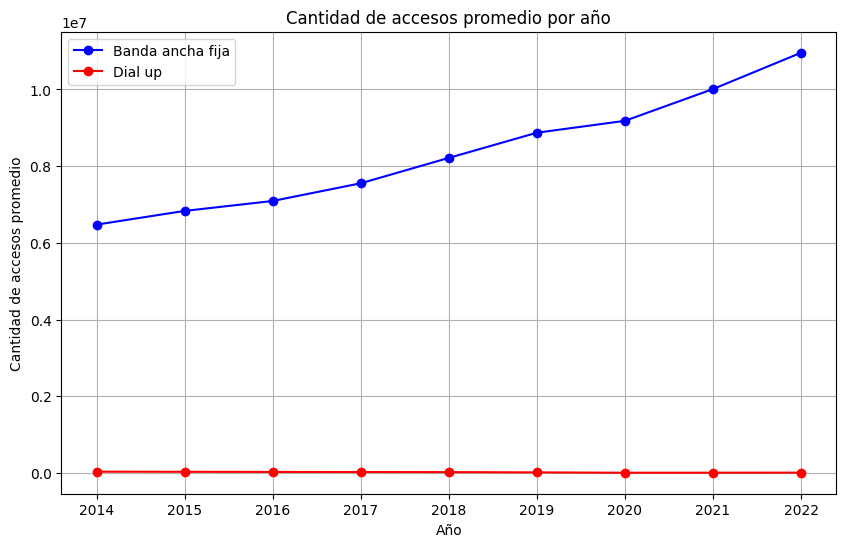

In [51]:
import matplotlib.pyplot as plt

# Calcular el promedio de accesos por año para banda ancha fija y dial up
accesos_banda_ancha_fija_por_año = banda_totales['Banda ancha fija'].groupby(banda_totales['Año']).mean()
accesos_dial_up_por_año = banda_totales['Dial up'].groupby(banda_totales['Año']).mean()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))

# Añadir una línea para la cantidad de accesos promedio a banda ancha fija
plt.plot(accesos_banda_ancha_fija_por_año.index, accesos_banda_ancha_fija_por_año, marker='o', color='blue', label='Banda ancha fija')

# Añadir una línea para la cantidad de accesos promedio a dial up
plt.plot(accesos_dial_up_por_año.index, accesos_dial_up_por_año, marker='o', color='red', label='Dial up')

# Añadir título y etiquetas
plt.title('Cantidad de accesos promedio por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos promedio')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


Vemos que el dial up una tecnologia antigua con bajo rendimiento esta estancada  o en retroceso , en cambio la banda ancha fija ha mas que duplicado su valor

In [20]:
print("Información del dataframe acc_por_tec:")
print(acc_por_tec.info())
print('\n')
print("Primeras filas del dataframe acc_por_tec:")
print(acc_por_tec.head())
print("\n")

Información del dataframe acc_por_tec:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    864 non-null    int64 
 1   Año           864 non-null    object
 2   Trimestre     864 non-null    object
 3   Provincia     864 non-null    object
 4   ADSL          864 non-null    int64 
 5   Cablemodem    864 non-null    int64 
 6   Fibra óptica  864 non-null    int64 
 7   Wireless      864 non-null    int64 
 8   Otros         864 non-null    int64 
 9   Total         864 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 67.6+ KB
None


Primeras filas del dataframe acc_por_tec:
   Unnamed: 0   Año Trimestre        Provincia    ADSL  Cablemodem   
0           0  2022         4     Buenos Aires  325908     2767247  \
1           1  2022         4  Capital Federal  138753     1238196   
2           2  2022         4        Catam

In [21]:
acc_por_tec.columns

Index(['Unnamed: 0', 'Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem',
       'Fibra óptica', 'Wireless', 'Otros', 'Total'],
      dtype='object')

Resumen de las tecnologias :

ADSL (Asymmetric Digital Subscriber Line): Es una tecnología de banda ancha fija que utiliza la línea telefónica existente para proporcionar acceso a Internet de alta velocidad. La palabra "asimétrica" en el nombre se refiere a que la velocidad de descarga (la velocidad a la que los datos se descargan desde Internet a su computadora) suele ser más rápida que la velocidad de carga (la velocidad a la que los datos se cargan desde su computadora a Internet).

Cablemodem: Es una tecnología de banda ancha fija que utiliza la misma infraestructura que el servicio de televisión por cable para proporcionar acceso a Internet de alta velocidad. Un cablemodem es un dispositivo que se conecta al cable coaxial que entra en su casa y proporciona una conexión a Internet.


Fibra óptica: Es una tecnología de banda ancha fija que utiliza cables de fibra óptica para proporcionar acceso a Internet de alta velocidad. La fibra óptica es capaz de transmitir grandes cantidades de datos a largas distancias sin pérdida de calidad, lo que la convierte en una de las opciones más rápidas y confiables para el acceso a Internet de banda ancha fija.

Wireless: Se refiere a las tecnologías de banda ancha fija que no requieren una conexión física para proporcionar acceso a Internet, como el Wi-Fi o las redes de telefonía móvil 4G y 5G. Estas tecnologías permiten a los usuarios conectarse a Internet de forma inalámbrica desde cualquier lugar dentro del alcance de la señal.

Otros: Este término podría referirse a otras tecnologías de banda ancha fija que no se ajustan a las categorías anteriores, como el acceso por satélite o el acceso por radio.

Total: Este término generalmente se refiere a la suma total de todas las conexiones de banda ancha fija, independientemente de la tecnología utilizada.


En términos de velocidad y confiabilidad, la fibra óptica es generalmente considerada como la mejor tecnología de banda ancha fija disponible en la actualidad. La fibra óptica es capaz de transmitir grandes cantidades de datos a largas distancias sin pérdida de calidad, lo que la convierte en una de las opciones más rápidas y confiables para el acceso a Internet de banda ancha fija.

En comparación, el acceso telefónico (dial-up) es generalmente considerado como la tecnología de banda ancha fija más deficiente en términos de velocidad y confiabilidad. La velocidad de la conexión de acceso telefónico es significativamente más lenta que las conexiones de banda ancha fija y puede ser menos confiable debido a factores como la calidad de la línea telefónica y la distancia entre el usuario y el proveedor de servicios de Internet (ISP).

El ADSL y el cablemodem se encuentran en algún punto intermedio en términos de velocidad y confiabilidad. Ambas tecnologías son generalmente más rápidas y confiables que el acceso telefónico, pero pueden ser más lentas y menos confiables que la fibra óptica, especialmente en áreas con una gran cantidad de usuarios que comparten la misma infraestructura.

El cablemodem es una tecnología de banda ancha fija que utiliza la misma infraestructura que el servicio de televisión por cable para proporcionar acceso a Internet de alta velocidad. Un cablemodem es un dispositivo que se conecta al cable coaxial que entra en su casa y proporciona una conexión a Internet.

En términos de velocidad y confiabilidad, el cablemodem se encuentra generalmente en algún punto intermedio entre el ADSL y la fibra óptica. Las velocidades de conexión de cablemodem pueden ser bastante rápidas, especialmente en comparación con el acceso telefónico (dial-up), y suelen ser más confiables que el ADSL en áreas con una buena infraestructura de cable.

La tecnología inalámbrica, como el Wi-Fi o las redes de telefonía móvil 4G y 5G, puede ofrecer velocidades comparables a las de la fibra óptica en algunas áreas, pero la calidad de la conexión puede verse afectada por factores como la distancia entre el usuario y la torre de telefonía móvil más cercana, la cantidad de usuarios que comparten la misma torre y la interferencia de otros dispositivos inalámbricos.

In [22]:
acc_por_tec['Año'].unique()

array([2022, 2021, 2020, 2019, '2019 *', 2018, 2017, 2016, 2015, 2014],
      dtype=object)

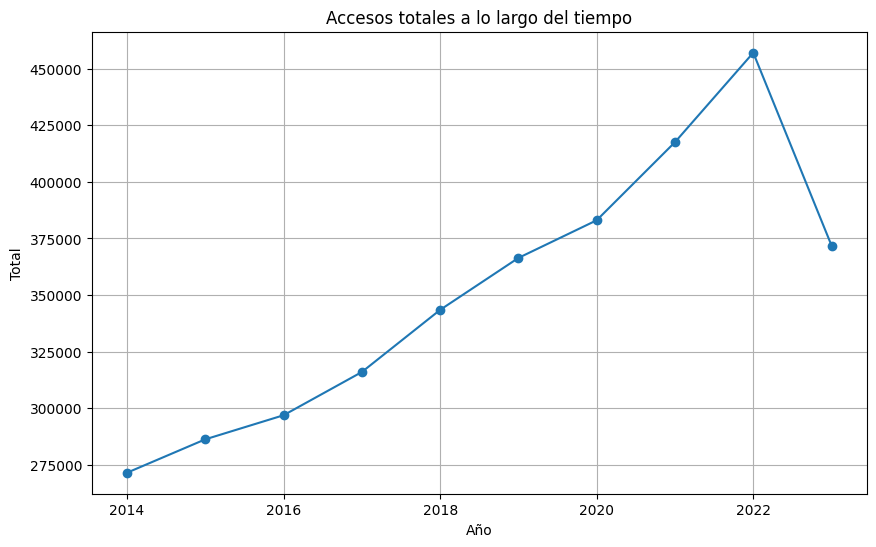

<Figure size 1000x600 with 0 Axes>

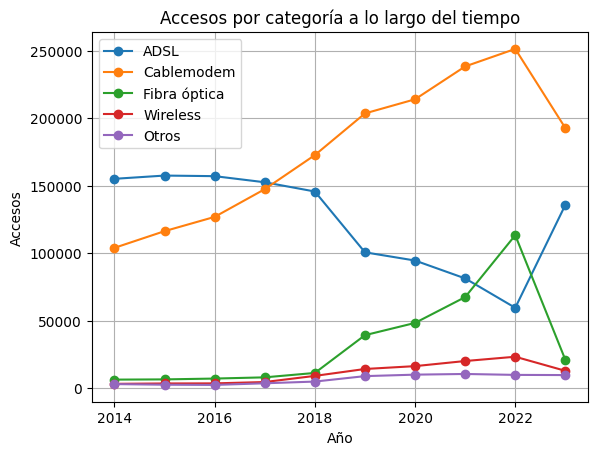

In [23]:
# Reemplazar '2019 *' por '2019' en la columna "Año"
acc_por_tec['Año'] = acc_por_tec['Año'].replace('2019 *', '2019')

# Gráfico 1: Accesos totales a lo largo del tiempo
plt.figure(figsize=(10, 6))
acc_por_tec.groupby('Año')['Total'].mean().plot(marker='o')
plt.title('Accesos totales a lo largo del tiempo')
plt.ylabel('Total')
plt.xlabel('Año')
plt.grid(True)
plt.show()

# Gráfico 2: Accesos por categoría a lo largo del tiempo
plt.figure(figsize=(10, 6))
acc_por_tec.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].mean().plot(marker='o')
plt.title('Accesos por categoría a lo largo del tiempo')
plt.ylabel('Accesos')
plt.xlabel('Año')
plt.legend()
plt.grid(True)
plt.show()



En este grafico hay que tener en cuenta hasta el 2022 , si tenemos es cuenta eso,
podemos ver un crecimiento exponencial en la cantidad de accesos , y ademas los aumentos mas pronunciados se producen en las tecnologias Cable Modem y Fibra Optica las tecnologias mas avanzadas junto con el 5G , mientras que se presenta un descenso en ADSL una tecnología un poco mas antigua que estas 2

In [24]:
print("Información del dataframe acc_por_tec_totales:")
print(acc_por_tec_totales.info())
print('\n')
print("Primeras filas del dataframe acc_por_tec_totales:")
print(acc_por_tec_totales.head())
print("\n")

Información del dataframe acc_por_tec_totales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    36 non-null     int64 
 1   Año           36 non-null     int64 
 2   Trimestre     36 non-null     int64 
 3   ADSL          36 non-null     int64 
 4   Cablemodem    36 non-null     int64 
 5   Fibra óptica  36 non-null     int64 
 6   Wireless      36 non-null     int64 
 7   Otros         36 non-null     int64 
 8   Total         36 non-null     int64 
 9   Periodo       36 non-null     object
dtypes: int64(9), object(1)
memory usage: 2.9+ KB
None


Primeras filas del dataframe acc_por_tec_totales:
   Unnamed: 0   Año  Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   
0           0  2022          4  1315373     6037457       3060575    572969  \
1           1  2022          3  1395277     6031970       2871541    557110   
2 

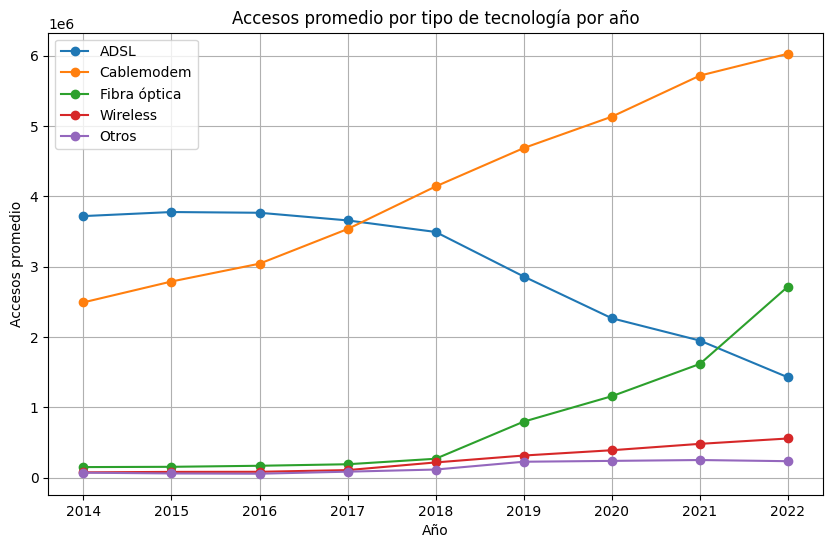

In [25]:
import matplotlib.pyplot as plt

# Calcular el promedio de accesos por tipo de tecnología y año
accesos_por_tecnologia_por_año = acc_por_tec_totales.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].mean()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))

# Añadir líneas para cada tipo de tecnología
plt.plot(accesos_por_tecnologia_por_año.index, accesos_por_tecnologia_por_año['ADSL'], marker='o', label='ADSL')
plt.plot(accesos_por_tecnologia_por_año.index, accesos_por_tecnologia_por_año['Cablemodem'], marker='o', label='Cablemodem')
plt.plot(accesos_por_tecnologia_por_año.index, accesos_por_tecnologia_por_año['Fibra óptica'], marker='o', label='Fibra óptica')
plt.plot(accesos_por_tecnologia_por_año.index, accesos_por_tecnologia_por_año['Wireless'], marker='o', label='Wireless')
plt.plot(accesos_por_tecnologia_por_año.index, accesos_por_tecnologia_por_año['Otros'], marker='o', label='Otros')

# Añadir título y etiquetas
plt.title('Accesos promedio por tipo de tecnología por año')
plt.xlabel('Año')
plt.ylabel('Accesos promedio')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


En el dataset de totales se puede observar lo mismo

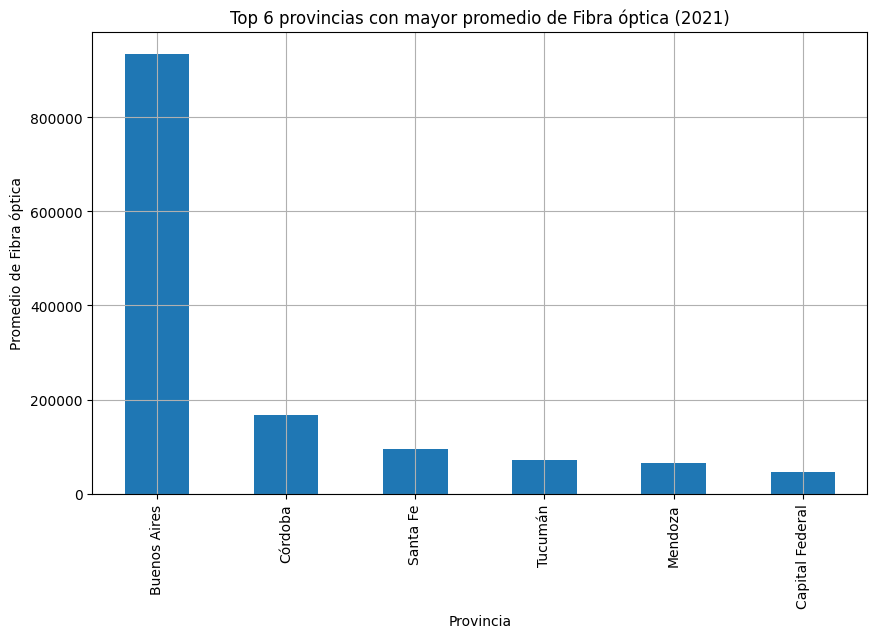

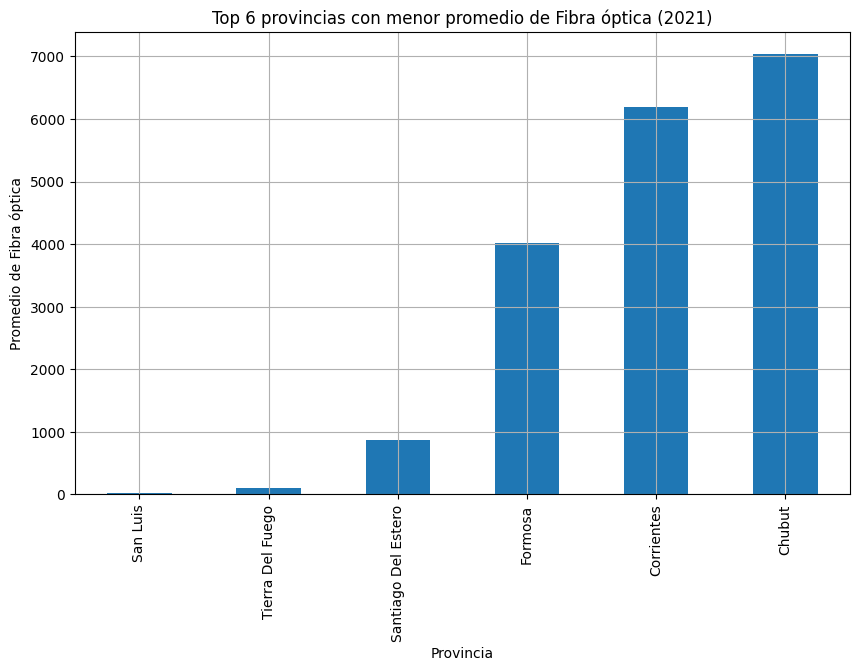

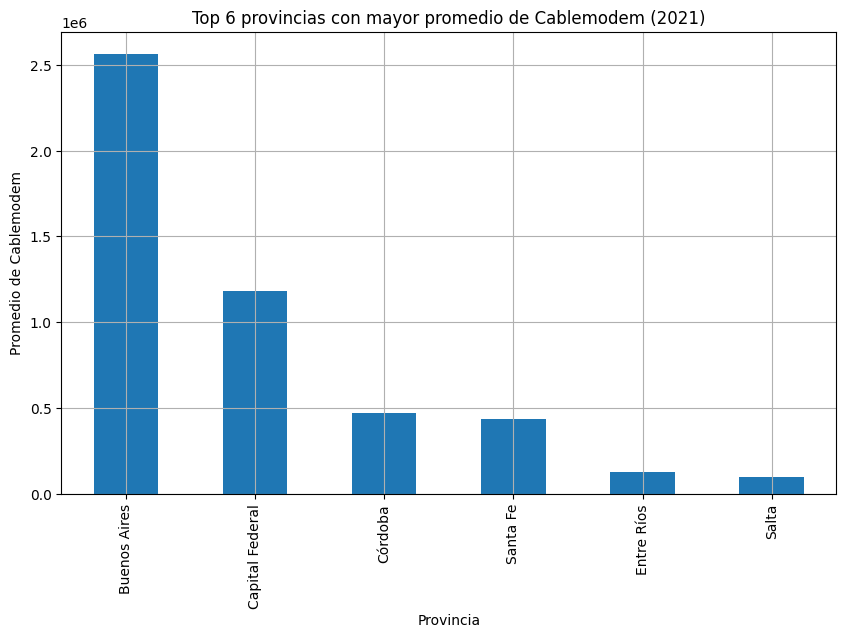

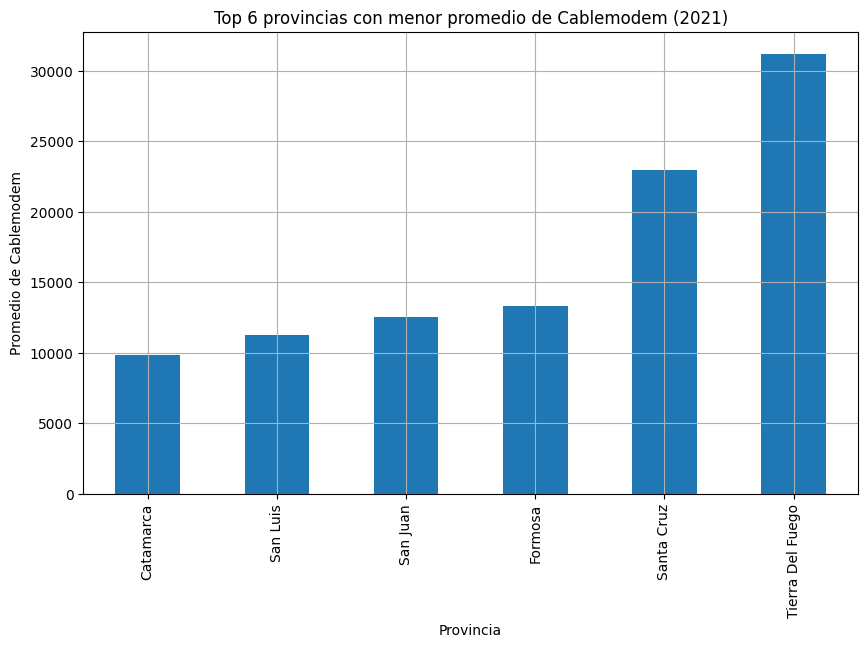

In [26]:
# Filtrar los datos para el año 2021
datos_2021 = acc_por_tec[acc_por_tec['Año'] == 2021]

# Verificar si hay datos para el año 2021
if not datos_2021.empty:
    # Calcular el promedio de Fibra óptica y Cablemodem para cada provincia
    promedio_fibra_optica = datos_2021.groupby('Provincia')['Fibra óptica'].mean()
    promedio_cablemodem = datos_2021.groupby('Provincia')['Cablemodem'].mean()

    # Verificar si hay datos para la columna "Fibra óptica" en el año 2021
    if not promedio_fibra_optica.empty:
        # Obtener las 6 provincias con mayor promedio de Fibra óptica
        top_6_mayor_fibra_optica = promedio_fibra_optica.nlargest(6)

        # Obtener las 6 provincias con menor promedio de Fibra óptica
        top_6_menor_fibra_optica = promedio_fibra_optica.nsmallest(6)

        # Gráfico de barras con las 6 provincias con mayor promedio de Fibra óptica
        plt.figure(figsize=(10, 6))
        top_6_mayor_fibra_optica.plot(kind='bar')
        plt.title('Top 6 provincias con mayor promedio de Fibra óptica (2021)')
        plt.ylabel('Promedio de Fibra óptica')
        plt.xlabel('Provincia')
        plt.grid(True)
        plt.show()

        # Gráfico de barras con las 6 provincias con menor promedio de Fibra óptica
        plt.figure(figsize=(10, 6))
        top_6_menor_fibra_optica.plot(kind='bar')
        plt.title('Top 6 provincias con menor promedio de Fibra óptica (2021)')
        plt.ylabel('Promedio de Fibra óptica')
        plt.xlabel('Provincia')
        plt.grid(True)
        plt.show()

    # Verificar si hay datos para la columna "Cablemodem" en el año 2021
    if not promedio_cablemodem.empty:
        # Obtener las 6 provincias con mayor promedio de Cablemodem
        top_6_mayor_cablemodem = promedio_cablemodem.nlargest(6)

        # Obtener las 6 provincias con menor promedio de Cablemodem
        top_6_menor_cablemodem = promedio_cablemodem.nsmallest(6)

        # Gráfico de barras con las 6 provincias con mayor promedio de Cablemodem
        plt.figure(figsize=(10, 6))
        top_6_mayor_cablemodem.plot(kind='bar')
        plt.title('Top 6 provincias con mayor promedio de Cablemodem (2021)')
        plt.ylabel('Promedio de Cablemodem')
        plt.xlabel('Provincia')
        plt.grid(True)
        plt.show()

        # Gráfico de barras con las 6 provincias con menor promedio de Cablemodem
        plt.figure(figsize=(10, 6))
        top_6_menor_cablemodem.plot(kind='bar')
        plt.title('Top 6 provincias con menor promedio de Cablemodem (2021)')
        plt.ylabel('Promedio de Cablemodem')
        plt.xlabel('Provincia')
        plt.grid(True)
        plt.show()
else:
    print('No hay datos para el año 2021')


Las provincias con menos promedio de conexiones , podrias ser oportunidades de inversion:

Para Cable Modem : Catamarca, San Luis, San Juan, Formosa, Santa Cruz, Tierra del Fuego

Para Fibra Optica : San Luis , Tierra del fuego , Santiago del Estero, Formosa, 
Corrientes y Chubut

Claramente se repite el patron de provincias mas pobladas , ricas y urbanizadas con mas y mejores conexiones de internet : CABA, Buenos Aires , Cordoba , Santas Fé y Mendoza suelen estar en el TOP

In [27]:
print("Información del dataframe acc_por_vel_totales:")
print(acc_por_vel_totales.info())
print('\n')
print("Primeras filas del dataframe acc_por_vel_totales:")
print(acc_por_vel_totales.head())
print("\n")

Información del dataframe acc_por_vel_totales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Unnamed: 0               36 non-null     int64
 1   Año                      36 non-null     int64
 2   Trimestre                36 non-null     int64
 3   Hasta 512 kbps           36 non-null     int64
 4   Entre 512 Kbps y 1 Mbps  36 non-null     int64
 5   Entre 1 Mbps y 6 Mbps    36 non-null     int64
 6   Entre 6 Mbps y 10 Mbps   36 non-null     int64
 7   Entre 10 Mbps y 20 Mbps  36 non-null     int64
 8   Entre 20 Mbps y 30 Mbps  36 non-null     int64
 9   Más de 30 Mbps           36 non-null     int64
 10  OTROS                    36 non-null     int64
 11  Total                    36 non-null     int64
dtypes: int64(12)
memory usage: 3.5 KB
None


Primeras filas del dataframe acc_por_vel_totales:
   Unnamed: 0   Año  Trime

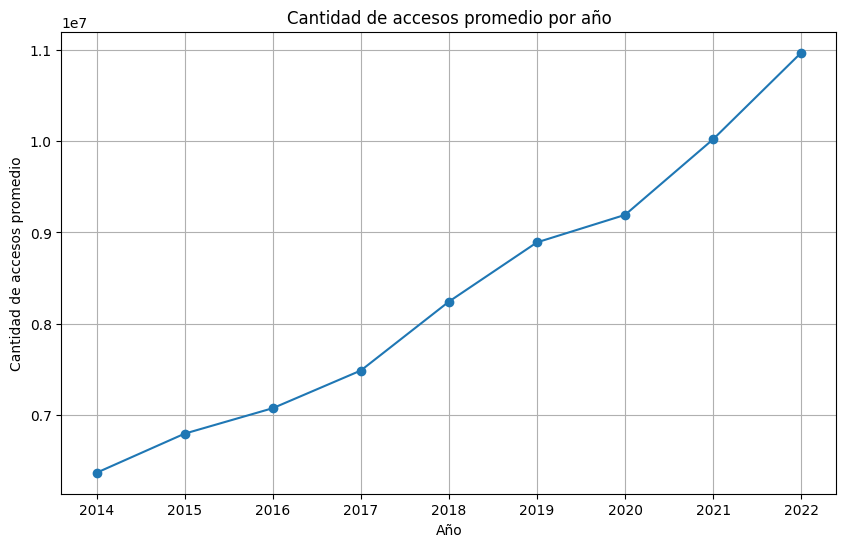

In [28]:
import matplotlib.pyplot as plt

# Calcular el promedio de accesos por año
accesos_por_año = acc_por_vel_totales.groupby('Año')['Total'].mean()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))

# Añadir una línea para la cantidad de accesos promedio
plt.plot(accesos_por_año.index, accesos_por_año, marker='o')

# Añadir título y etiquetas
plt.title('Cantidad de accesos promedio por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos promedio')

# Mostrar el gráfico
plt.grid(True)
plt.show()


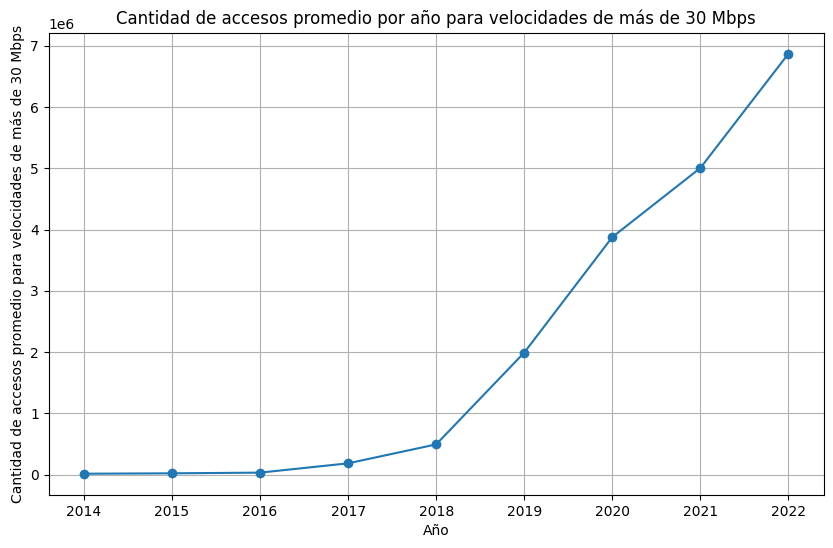

In [29]:
import matplotlib.pyplot as plt

# Filtrar las filas donde la velocidad es "Más de 30 Mbps"
accesos_mas_30_mbps = acc_por_vel_totales['Más de 30 Mbps']

# Calcular el promedio de accesos por año para velocidades de más de 30 Mbps
accesos_mas_30_mbps_por_año = accesos_mas_30_mbps.groupby(acc_por_vel_totales['Año']).mean()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))

# Añadir una línea para la cantidad de accesos promedio para velocidades de más de 30 Mbps
plt.plot(accesos_mas_30_mbps_por_año.index, accesos_mas_30_mbps_por_año, marker='o')

# Añadir título y etiquetas
plt.title('Cantidad de accesos promedio por año para velocidades de más de 30 Mbps')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos promedio para velocidades de más de 30 Mbps')

# Mostrar el gráfico
plt.grid(True)
plt.show()


Podemos que la cantidad total de accesos ha aumentado linealmente pero la cantidad de accesos de mas de 30 Mbps ha aumentado exponencialmente, a partir de 2016

In [30]:
print("Información del dataframe acc_por_vel:")
print(acc_por_vel.info())
print('\n')
print("Primeras filas del dataframe acc_por_vel:")
print(acc_por_vel.head())
print("\n")

Información del dataframe acc_por_vel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           864 non-null    int64  
 1   Año                  864 non-null    int64  
 2   Trimestre            864 non-null    int64  
 3   Provincia            864 non-null    object 
 4   HASTA 512 kbps       864 non-null    float64
 5   + 512 Kbps - 1 Mbps  864 non-null    float64
 6   + 1 Mbps - 6 Mbps    864 non-null    float64
 7   + 6 Mbps - 10 Mbps   864 non-null    float64
 8   + 10 Mbps - 20 Mbps  864 non-null    float64
 9   + 20 Mbps - 30 Mbps  864 non-null    float64
 10  + 30 Mbps            864 non-null    float64
 11  OTROS                858 non-null    float64
 12  Total                864 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 87.9+ KB
None


Primeras filas del dataframe acc_por

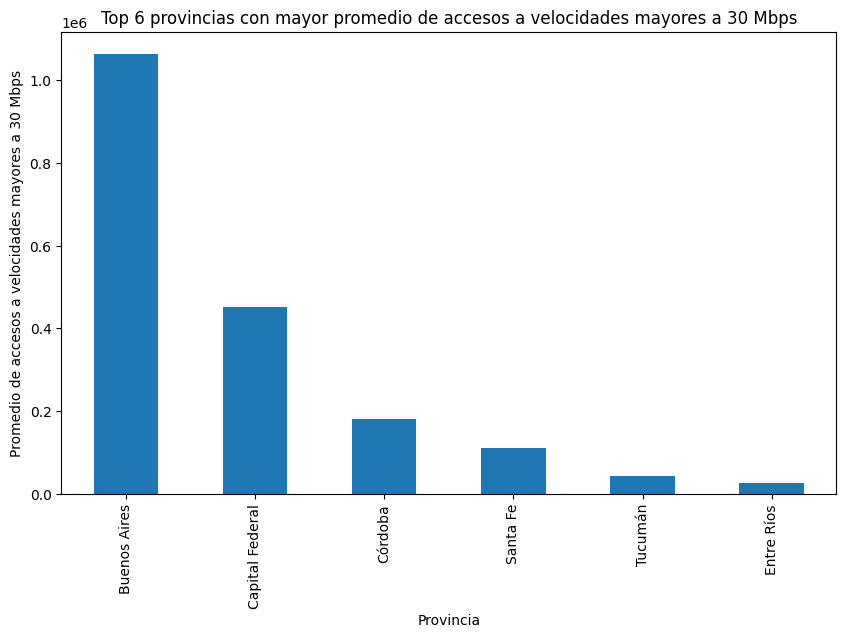

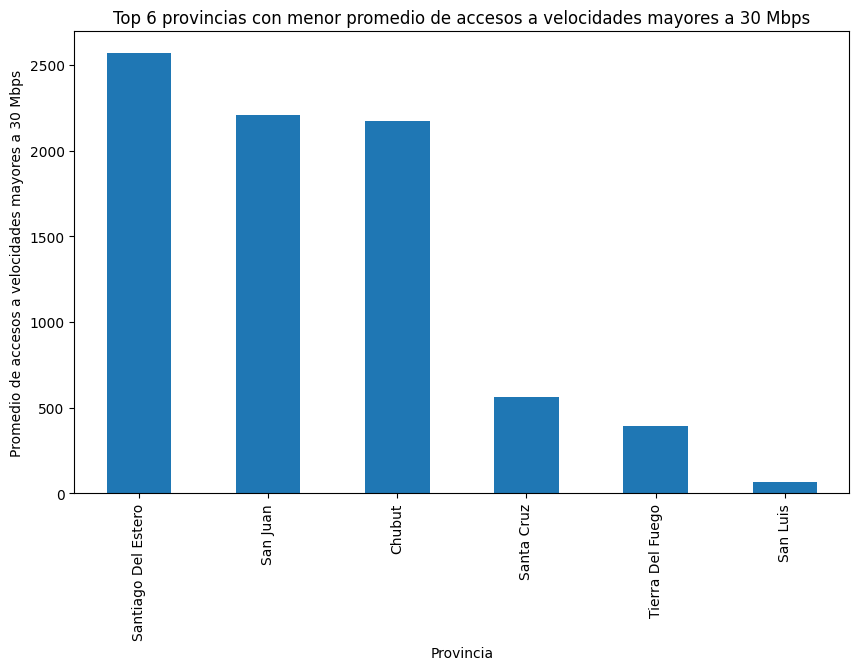

In [31]:
import matplotlib.pyplot as plt

# Calcular el promedio de accesos a velocidades mayores a 30 Mbps por provincia
promedio_30mbps = acc_por_vel.groupby('Provincia')['+ 30 Mbps'].mean()

# Ordenar las provincias por promedio de accesos a velocidades mayores a 30 Mbps
provincias_ordenadas_30mbps = promedio_30mbps.sort_values(ascending=False)

# Seleccionar las 6 provincias con mayor y menor promedio de accesos a velocidades mayores a 30 Mbps
top_6_mayor_30mbps = provincias_ordenadas_30mbps.head(6)
top_6_menor_30mbps = provincias_ordenadas_30mbps.tail(6)

# Graficar las 6 provincias con mayor promedio de accesos a velocidades mayores a 30 Mbps
plt.figure(figsize=(10, 6))
top_6_mayor_30mbps.plot(kind='bar')
plt.title('Top 6 provincias con mayor promedio de accesos a velocidades mayores a 30 Mbps')
plt.ylabel('Promedio de accesos a velocidades mayores a 30 Mbps')
plt.show()

# Graficar las 6 provincias con menor promedio de accesos a velocidades mayores a 30 Mbps
plt.figure(figsize=(10, 6))
top_6_menor_30mbps.plot(kind='bar')
plt.title('Top 6 provincias con menor promedio de accesos a velocidades mayores a 30 Mbps')
plt.ylabel('Promedio de accesos a velocidades mayores a 30 Mbps')
plt.show()


Como podemos ver los top son siempre similares

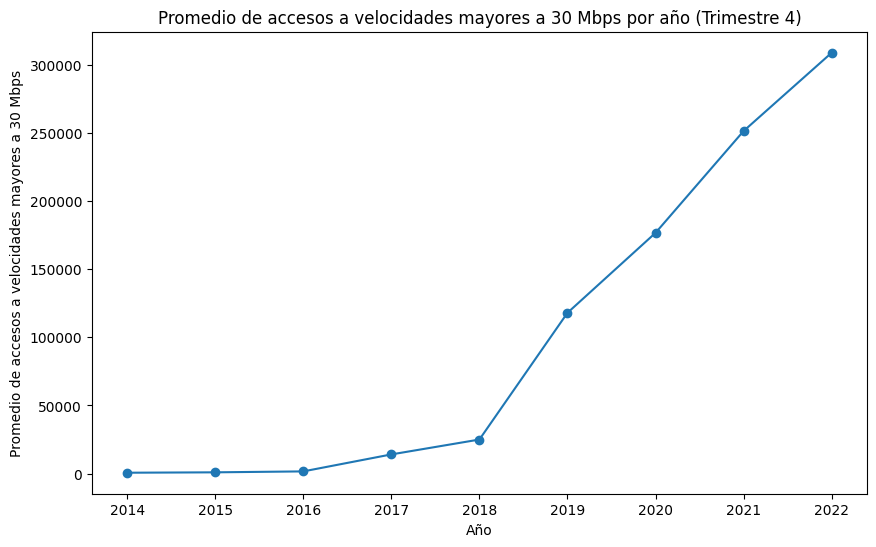

In [32]:
import matplotlib.pyplot as plt

# Filtrar los datos para el cuarto trimestre
datos_trimestre_4 = acc_por_vel[acc_por_vel['Trimestre'] == 4]

# Calcular el promedio de accesos a velocidades mayores a 30 Mbps por año
promedio_30mbps_anual = datos_trimestre_4.groupby('Año')['+ 30 Mbps'].mean()

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
promedio_30mbps_anual.plot(marker='o')
plt.title('Promedio de accesos a velocidades mayores a 30 Mbps por año (Trimestre 4)')
plt.xlabel('Año')
plt.ylabel('Promedio de accesos a velocidades mayores a 30 Mbps')
plt.show()


Este grafico es igual pero tiene en cuenta solo los datos del ultimo trimestre de cada año 

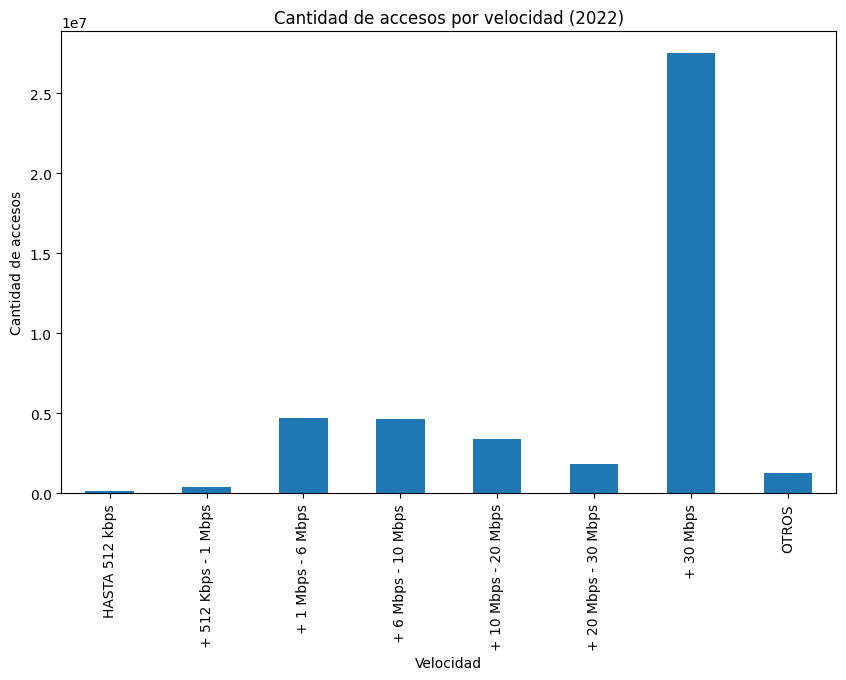

In [33]:
import matplotlib.pyplot as plt

# Filtrar los datos para el año 2022
datos_2022 = acc_por_vel[acc_por_vel['Año'] == 2022]

# Calcular la cantidad total de accesos por velocidad
accesos_por_velocidad = datos_2022.iloc[:, 4:12].sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
accesos_por_velocidad.plot(kind='bar')
plt.title('Cantidad de accesos por velocidad (2022)')
plt.xlabel('Velocidad')
plt.ylabel('Cantidad de accesos')
plt.show()


Podemos ver que en el año 2022 la mayoria de los accesos son de mas de 30 Mbps de bajada promedio

In [34]:
print("Información del dataframe ingresos:")
print(ingresos.info())
print('\n')
print("Primeras filas del dataframe ingresos:")
print(ingresos.head())
print("\n")

Información del dataframe ingresos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
 3   Periodo                    36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB
None


Primeras filas del dataframe ingresos:
    Año  Trimestre  Ingresos (miles de pesos)        Periodo
0  2022          4               7.244348e+07   Oct-Dic 2022
1  2022          3               6.408678e+07  Jul-Sept 2022
2  2022          2               6.041950e+07   Abr-Jun 2022
3  2022          1               5.521931e+07   Ene-Mar 2022
4  2021          4               4.546789e+07   Oct-Dic 2021




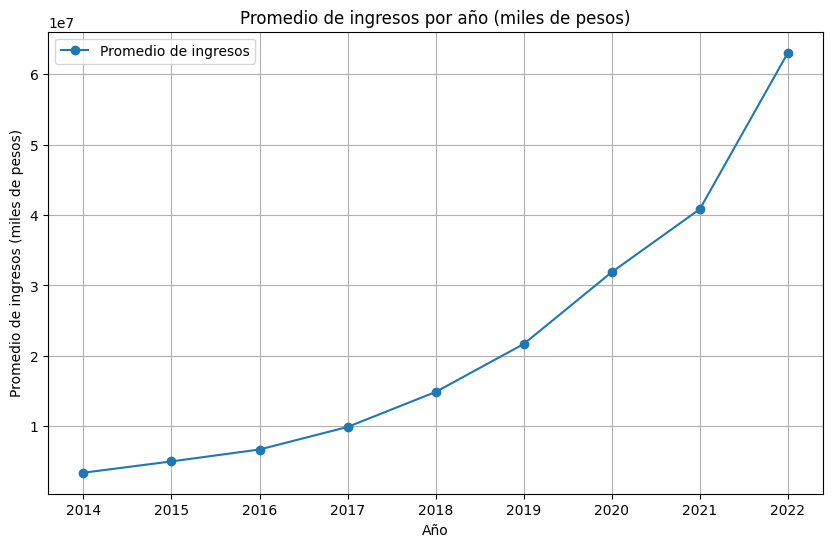

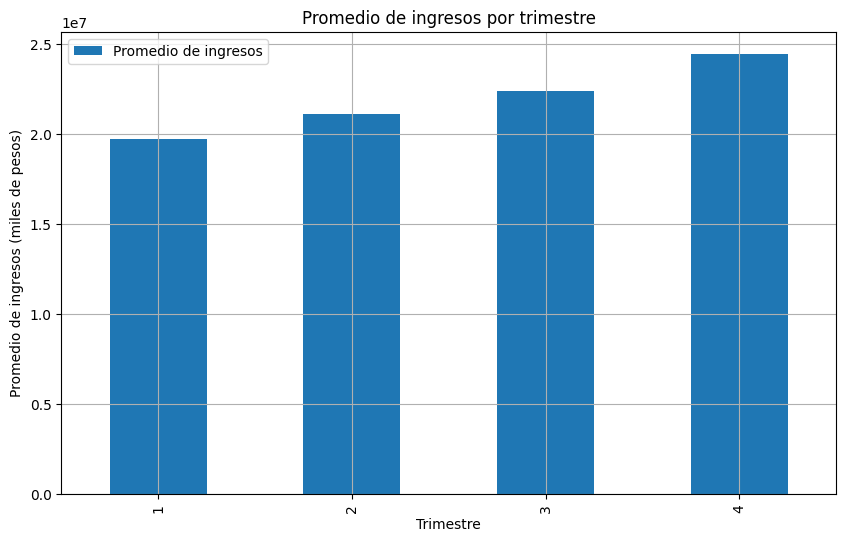

<Figure size 1000x600 with 0 Axes>

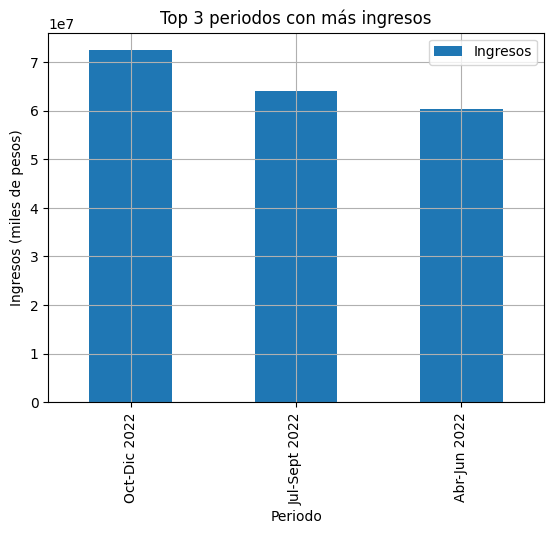

In [35]:
# Gráfico de líneas con el promedio de ingresos por año
plt.figure(figsize=(10, 6))
ingresos.groupby('Año')['Ingresos (miles de pesos)'].mean().plot(marker='o', label='Promedio de ingresos')
plt.title('Promedio de ingresos por año (miles de pesos)')
plt.ylabel('Promedio de ingresos (miles de pesos)')
plt.xlabel('Año')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de barras con el promedio de ingresos por trimestre
plt.figure(figsize=(10, 6))
ingresos.groupby('Trimestre')['Ingresos (miles de pesos)'].mean().plot(kind='bar', label='Promedio de ingresos')
plt.title('Promedio de ingresos por trimestre')
plt.ylabel('Promedio de ingresos (miles de pesos)')
plt.xlabel('Trimestre')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de barras con el top 3 periodos con más ingresos
plt.figure(figsize=(10, 6))
top_3_periodos = ingresos.sort_values('Ingresos (miles de pesos)', ascending=False).head(3)
top_3_periodos.plot(x='Periodo', y='Ingresos (miles de pesos)', kind='bar', label='Ingresos')
plt.title('Top 3 periodos con más ingresos')
plt.ylabel('Ingresos (miles de pesos)')
plt.xlabel('Periodo')
plt.legend()
plt.grid(True)
plt.show()


Vemos que los ingresos han crecido exponencialmente año a año, no hay tanta variacion por trimestre lo que significa que no hay estacionalidad anual en el nivel de ingresos


In [36]:
print("Información del dataframe conectividad:")
print(conectividad.info())
print('\n')
print("Primeras filas del dataframe conectividad:")
print(conectividad.head())
print("\n")

Información del dataframe conectividad:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4311 non-null   int64  
 1   Provincia       4311 non-null   object 
 2   Partido         4311 non-null   object 
 3   Localidad       4311 non-null   object 
 4   Población       4311 non-null   int64  
 5   ADSL            4311 non-null   int64  
 6   Cablemódem      4311 non-null   int64  
 7   Dial Up         4311 non-null   int64  
 8   Fibra óptica    4311 non-null   int64  
 9   Satelital       4311 non-null   int64  
 10  Wireless        4311 non-null   int64  
 11  Telefonía Fija  4311 non-null   int64  
 12  3G              4311 non-null   int64  
 13  4G              4311 non-null   int64  
 14  Link            4299 non-null   float64
 15  Latitud         4311 non-null   float64
 16  Longitud        4311 non-null   float6

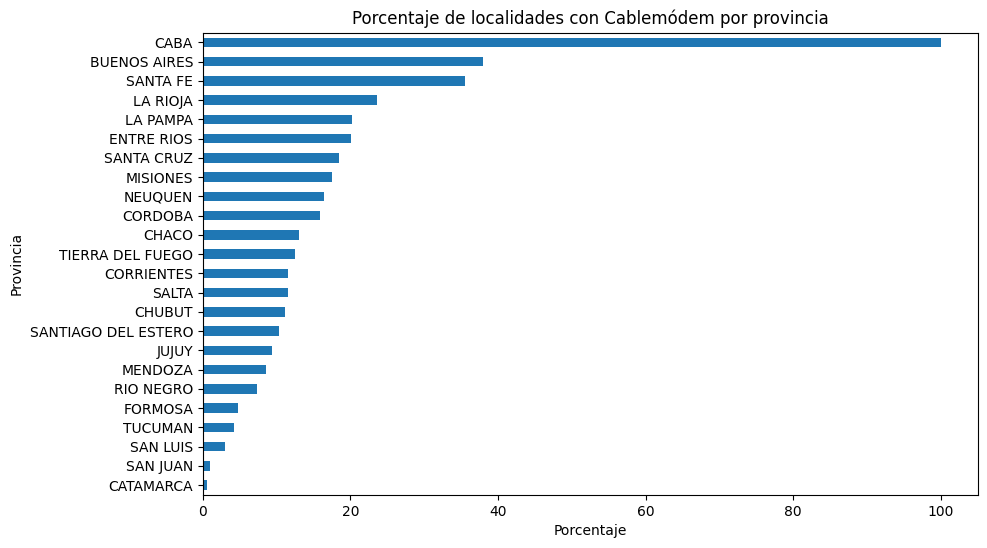

In [37]:
import matplotlib.pyplot as plt

# Calcular la cantidad total de localidades por provincia
localidades_por_provincia = conectividad['Provincia'].value_counts()

# Calcular la cantidad de localidades con Cablemódem por provincia
localidades_con_cablemodem = conectividad[conectividad['Cablemódem'] > 0]['Provincia'].value_counts()

# Calcular el porcentaje de localidades con Cablemódem por provincia
porcentaje_localidades_con_cablemodem = localidades_con_cablemodem / localidades_por_provincia * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
porcentaje_localidades_con_cablemodem.sort_values().plot(kind='barh')
plt.title('Porcentaje de localidades con Cablemódem por provincia')
plt.xlabel('Porcentaje')
plt.ylabel('Provincia')
plt.show()


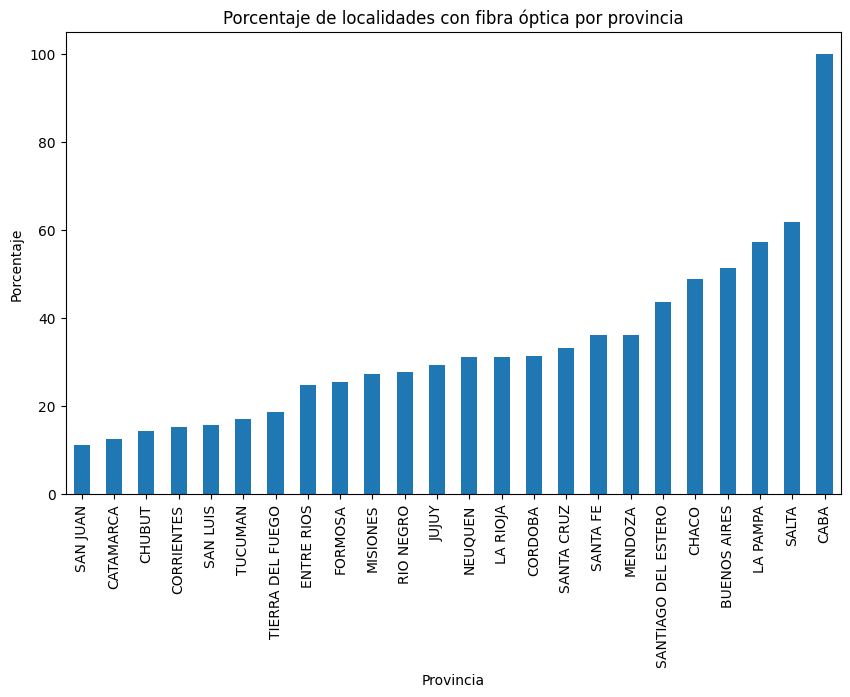

In [38]:
import matplotlib.pyplot as plt

# Calcular la cantidad total de localidades por provincia
localidades_por_provincia = conectividad['Provincia'].value_counts()

# Calcular la cantidad de localidades con fibra óptica por provincia
localidades_con_fibra_optica = conectividad[conectividad['Fibra óptica'] > 0]['Provincia'].value_counts()

# Calcular el porcentaje de localidades con fibra óptica por provincia
porcentaje_localidades_con_fibra_optica = (localidades_con_fibra_optica / localidades_por_provincia) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
porcentaje_localidades_con_fibra_optica.sort_values().plot(kind='bar')
plt.title('Porcentaje de localidades con fibra óptica por provincia')
plt.ylabel('Porcentaje')
plt.xlabel('Provincia')

# Mostrar el gráfico
plt.show()


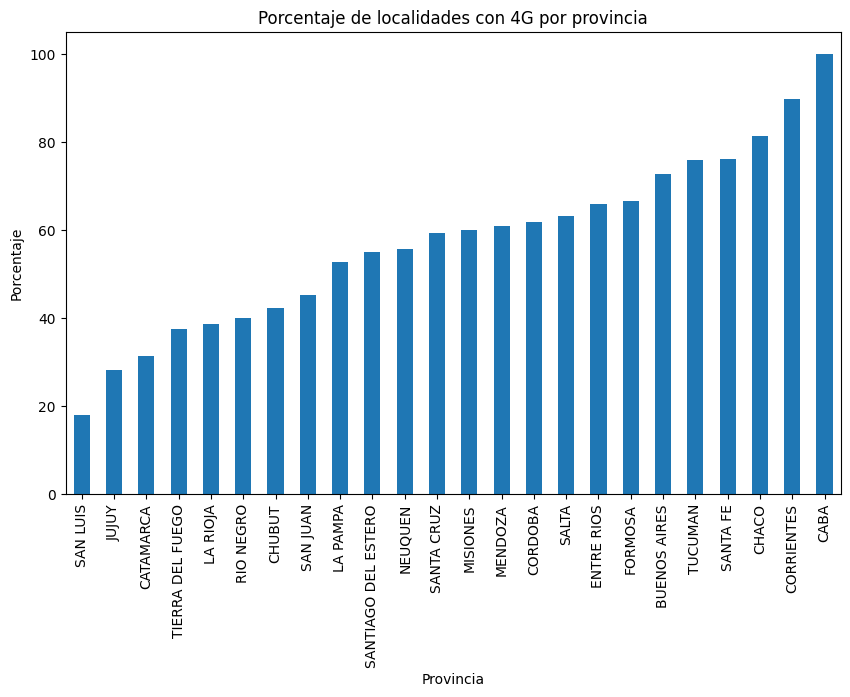

In [39]:
# Calcular la cantidad de localidades con 4G por provincia
localidades_con_4g = conectividad[conectividad['4G'] > 0]['Provincia'].value_counts()

# Calcular el porcentaje de localidades con 4G por provincia
porcentaje_localidades_con_4g = (localidades_con_4g / localidades_por_provincia) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
porcentaje_localidades_con_4g.sort_values().plot(kind='bar')
plt.title('Porcentaje de localidades con 4G por provincia')
plt.ylabel('Porcentaje')
plt.xlabel('Provincia')

# Mostrar el gráfico
plt.show()


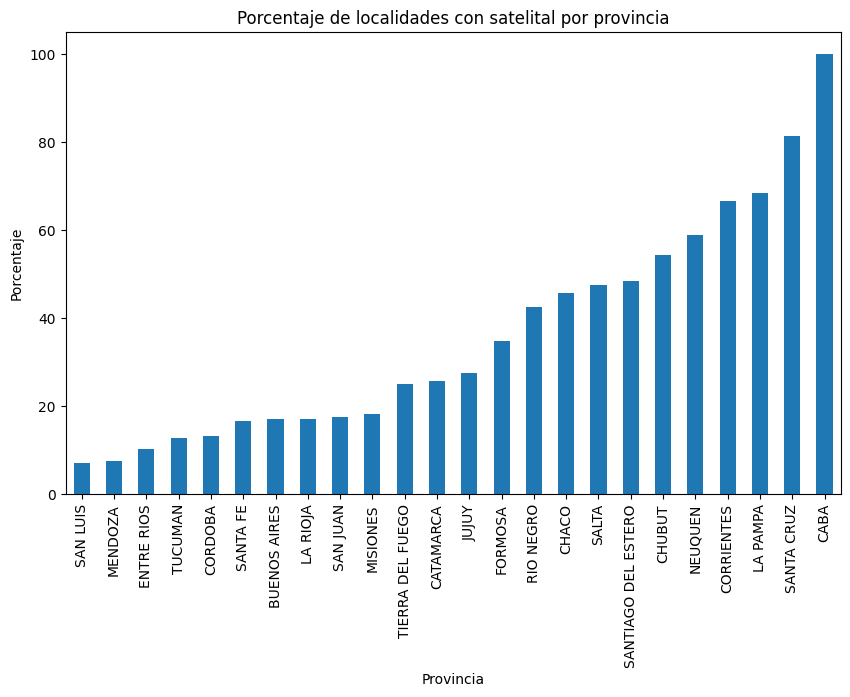

In [40]:
# Calcular la cantidad de localidades con satelital por provincia
localidades_con_satelital = conectividad[conectividad['Satelital'] > 0]['Provincia'].value_counts()

# Calcular el porcentaje de localidades con satelital por provincia
porcentaje_localidades_con_satelital = (localidades_con_satelital / localidades_por_provincia) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
porcentaje_localidades_con_satelital.sort_values().plot(kind='bar')
plt.title('Porcentaje de localidades con satelital por provincia')
plt.ylabel('Porcentaje')
plt.xlabel('Provincia')

# Mostrar el gráfico
plt.show()


Acá podemos observar que muchas de las provincias que siempre estan en el fondo del top acá están punteras , por que son las mas dependientes del internet satelital 

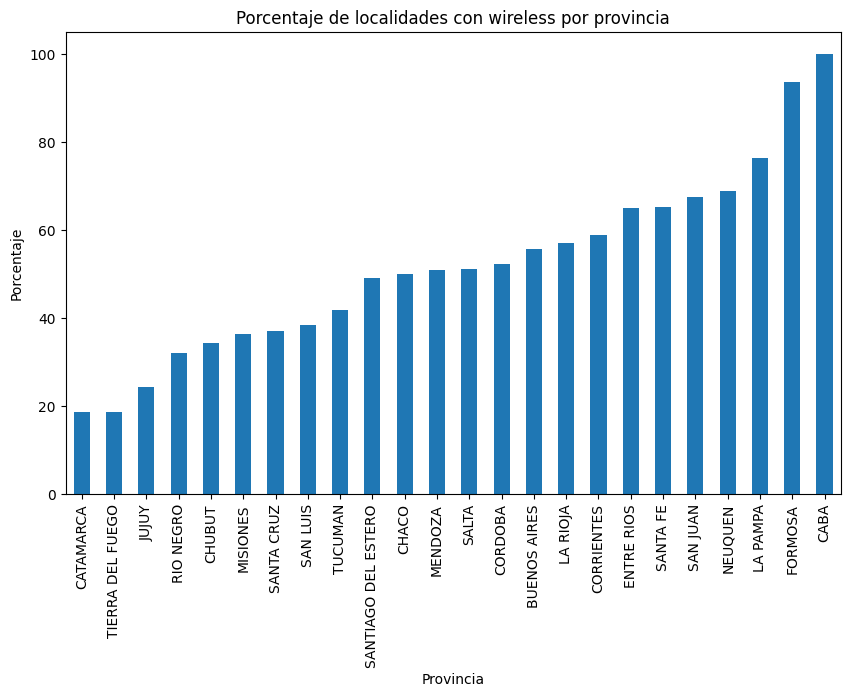

In [41]:
# Calcular la cantidad de localidades con wireless por provincia
localidades_con_wireless = conectividad[conectividad['Wireless'] > 0]['Provincia'].value_counts()

# Calcular el porcentaje de localidades con wireless por provincia
porcentaje_localidades_con_wireless = (localidades_con_wireless / localidades_por_provincia) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
porcentaje_localidades_con_wireless.sort_values().plot(kind='bar')
plt.title('Porcentaje de localidades con wireless por provincia')
plt.ylabel('Porcentaje')
plt.xlabel('Provincia')

# Mostrar el gráfico
plt.show()


En esta imagen podemos ver un fenomeno similar a la anterior imagen , muchas provincias , en el fondo del top en otras mediciones que tienen que ver mas con la conexion fija , aca se encuentran mas arriba lo que indica una falta de infraestructura para conexion fija quizá mas rapida , se ven obligados a usar metodos inalambricos que suelen tener una conexion mas lenta

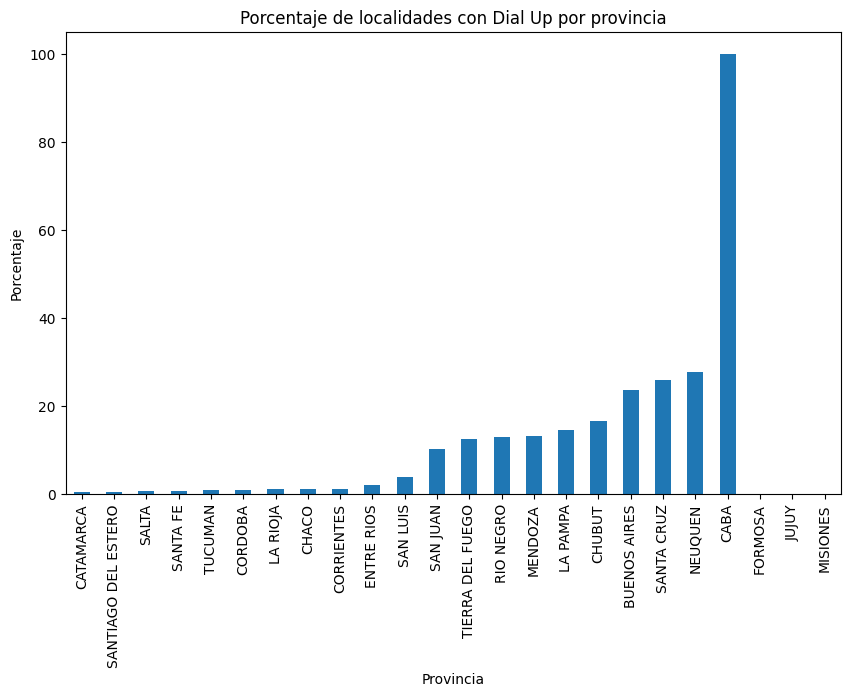

In [42]:
# Calcular la cantidad de localidades con Dial Up por provincia
localidades_con_dial_up = conectividad[conectividad['Dial Up'] > 0]['Provincia'].value_counts()

# Calcular el porcentaje de localidades con Dial Up por provincia
porcentaje_localidades_con_dial_up = (localidades_con_dial_up / localidades_por_provincia) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
porcentaje_localidades_con_dial_up.sort_values().plot(kind='bar')
plt.title('Porcentaje de localidades con Dial Up por provincia')
plt.ylabel('Porcentaje')
plt.xlabel('Provincia')

# Mostrar el gráfico
plt.show()


Vemos que el DIAL UP ya ni está presente en muchas localidades

In [43]:
print("Información del dataframe penetracion_hog:")
print(penetracion_hog.info())
print('\n')
print("Primeras filas del dataframe penetracion_hog:")
print(penetracion_hog.head())
print("\n")

Información del dataframe penetracion_hog:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    864 non-null    int64  
 1   Año                           864 non-null    int64  
 2   Trimestre                     864 non-null    int64  
 3   Provincia                     864 non-null    object 
 4   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 33.9+ KB
None


Primeras filas del dataframe penetracion_hog:
   Unnamed: 0   Año  Trimestre        Provincia  Accesos por cada 100 hogares
0           0  2022          4     Buenos Aires                         78.94
1           1  2022          4  Capital Federal                        122.73
2           2  2022          4        Catamarca                         65.77
3           

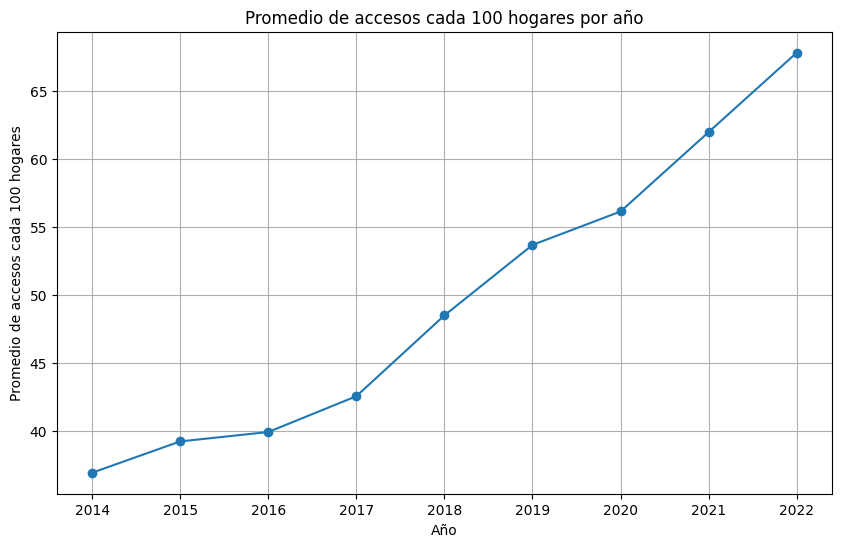

In [44]:
import matplotlib.pyplot as plt

# Calcular el promedio de accesos cada 100 hogares por año
promedio_anual = penetracion_hog.groupby('Año')['Accesos por cada 100 hogares'].mean()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
promedio_anual.plot(marker='o')
plt.title('Promedio de accesos cada 100 hogares por año')
plt.ylabel('Promedio de accesos cada 100 hogares')
plt.xlabel('Año')
plt.grid(True)
plt.show()


El promedio del numero de accesos por cada 100 hogares a pasado de poco mas de 30 cada 100 ,30 % a mas del cerca del 75 % en la actualidad 

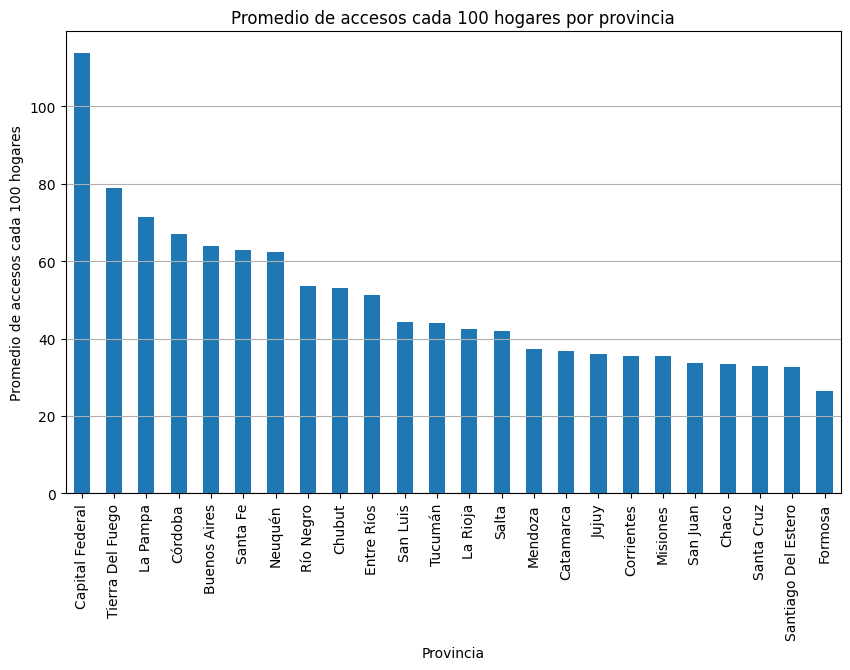

In [45]:
# Calcular el promedio de accesos cada 100 hogares por provincia
promedio_provincia = penetracion_hog.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
promedio_provincia.sort_values(ascending=False).plot(kind='bar')
plt.title('Promedio de accesos cada 100 hogares por provincia')
plt.ylabel('Promedio de accesos cada 100 hogares')
plt.xlabel('Provincia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


Aca vemos el promedio por provincia de accesos cada 100 hogares , sorprendentemente Tierra del Fuego tiene un alto porcentaje de accesos a internet cada 100 hogares tambien La Pampa , Rio Negro y Chubut

Formosa junto a Santiago del Estero, San Juan, Santa Cruz , estan en lo mas bajo de la medicion

In [46]:
print("Información del dataframe penetracion_pob:")
print(penetracion_pob.info())
print('\n')
print("Primeras filas del dataframe penetracion_pob:")
print(penetracion_pob.head())
print("\n")

Información del dataframe penetracion_pob:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                864 non-null    int64  
 1   Año                       864 non-null    int64  
 2   Trimestre                 864 non-null    int64  
 3   Provincia                 864 non-null    object 
 4   Accesos por cada 100 hab  864 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 33.9+ KB
None


Primeras filas del dataframe penetracion_pob:
   Unnamed: 0   Año  Trimestre        Provincia  Accesos por cada 100 hab
0           0  2022          4     Buenos Aires                     26.72
1           1  2022          4  Capital Federal                     50.35
2           2  2022          4        Catamarca                     16.73
3           3  2022          4            Chaco         

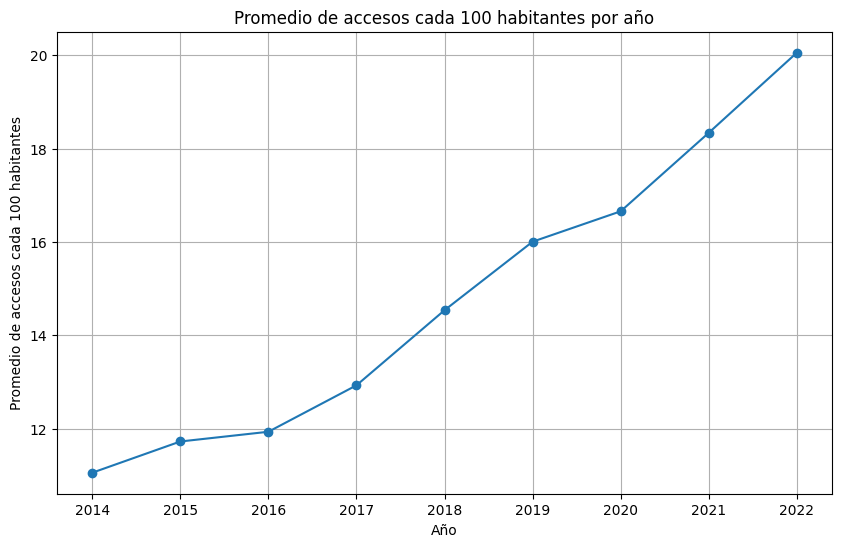

In [47]:
# Calcular el promedio de accesos cada 100 habitantes por año
promedio_anual_hab = penetracion_pob.groupby('Año')['Accesos por cada 100 hab'].mean()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
promedio_anual_hab.plot(marker='o')
plt.title('Promedio de accesos cada 100 habitantes por año')
plt.ylabel('Promedio de accesos cada 100 habitantes')
plt.xlabel('Año')
plt.grid(True)
plt.show()


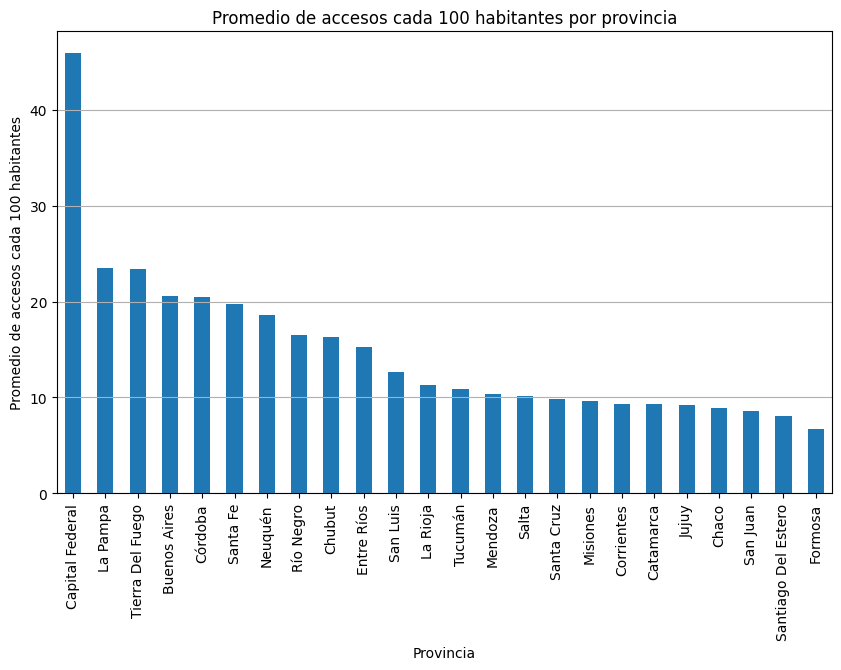

In [48]:
# Calcular el promedio de accesos cada 100 habitantes por provincia
promedio_provincia_hab = penetracion_pob.groupby('Provincia')['Accesos por cada 100 hab'].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
promedio_provincia_hab.sort_values(ascending=False).plot(kind='bar')
plt.title('Promedio de accesos cada 100 habitantes por provincia')
plt.ylabel('Promedio de accesos cada 100 habitantes')
plt.xlabel('Provincia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


In [49]:
print("Información del dataframe penetracion_totales:")
print(penetracion_totales.info())
print('\n')
print("Primeras filas del dataframe penetracion_totales:")
print(penetracion_totales.head())
print("\n")

Información del dataframe penetracion_totales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36 non-null     int64  
 1   Año                           36 non-null     int64  
 2   Trimestre                     36 non-null     int64  
 3   Accesos por cada 100 hogares  36 non-null     float64
 4   Accesos por cada 100 hab      36 non-null     float64
 5   Periodo                       36 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB
None


Primeras filas del dataframe penetracion_totales:
   Unnamed: 0   Año  Trimestre  Accesos por cada 100 hogares   
0           0  2022          4                     77.210000  \
1           1  2022          3                     76.640000   
2           2  2022          2                     75.965424   
3   

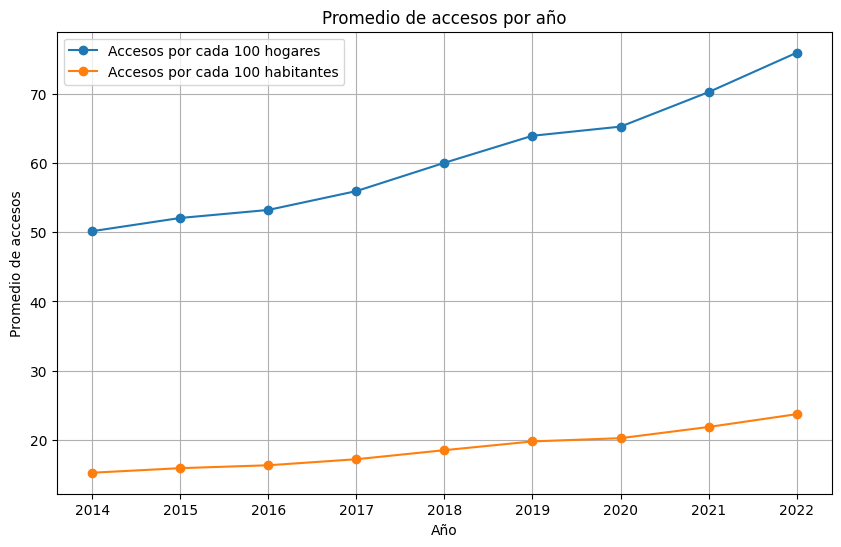

In [50]:
# Gráfico de líneas por Año
plt.figure(figsize=(10, 6))
penetracion_totales.groupby('Año')['Accesos por cada 100 hogares'].mean().plot(marker='o', label='Accesos por cada 100 hogares')
penetracion_totales.groupby('Año')['Accesos por cada 100 hab'].mean().plot(marker='o', label='Accesos por cada 100 habitantes')
plt.title('Promedio de accesos por año')
plt.ylabel('Promedio de accesos')
plt.xlabel('Año')
plt.legend()
plt.grid(True)
plt.show()

